In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.word2vec import Word2Vec
import multiprocessing
import time
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import logging  # Setting up the loggings to monitor gensim
import math
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
random.seed(42)
plt.rcParams['figure.figsize'] = (30, 20)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CGI/spotify/data/spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en




<table>
<tr>
<th> Variable</th>
<th> Class</th>
<th> description</th>
</tr>
<tr>
<td>track_id </td>
<td>character</td>
<td>	Song unique ID</td>
</tr>
<tr>
<td>track_name </td>
<td></td>
<td>	Song Name</td>
</tr>
<tr>
<td>track_artist</td>
<td></td>
<td>	Song Artist</td>
</tr>
<tr>
<td>lyrics	</td>
<td></td>
<td>	lyrics for the song</td>
</tr>
<tr>
<td>track_popularity</td>
<td></td>
<td>	Song Popularity (0-100) where higher is better</td>
</tr>
<tr>
<td>trackalbumname</td>
<td></td>
<td>	Song album name</td>
</tr>
<tr>
<td>playlist_genre	</td>
<td></td>
<td>	Playlist genre</td>
</tr>
<tr>
<td>playlist_subgenre</td>
<td></td>
<td>	Playlist subgenre</td>
</tr>
<tr>
<td>danceability</td>
<td>	double</td>
<td>	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
</tr>
<tr>
<td>energy</td>
<td>double</td>
<td>	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td>
</tr>
<tr>
<td>key</td>
<td>double</td>
<td>	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.</td>
</tr>
<tr>
<td>loudness</td>
<td>double</td>
<td>	The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.</td>
</tr>
<tr>
<td>mode</td>
<td>double</td>
<td>	Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
</tr>
<tr>
<td>speechiness</td>
<td>double</td>
<td>	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
</tr>
<tr>
<td>accousticness</td>
<td>double</td>
<td>	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
</tr>
<tr>
<td>instrumentalness</td>
<td>double</td>
<td>	Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
</tr>
<tr>
<td>liveness</td>
<td>double</td>
<td>	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
</tr>

<tr>
<td>valence</td>
<td>double</td>
<td>	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
</tr>
<tr>
<td>tempo</td>
<td>double</td>
<td>	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.</td>
</tr>
<tr>
<td>duration_ms</td>
<td>double</td>
<td>	Duration of song in milliseconds</td>
</tr>
<tr>
<td>language</td>
<td>char</td>
<td>	Language of the lyrics</td>
</tr>
</table>


In [ ]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [ ]:
df.shape

(18454, 25)

In [ ]:
df.isna().sum()

track_id                      0
track_name                    0
track_artist                  0
lyrics                      260
track_popularity              0
track_album_id                0
track_album_name              0
track_album_release_date      0
playlist_name                 0
playlist_id                   0
playlist_genre                0
playlist_subgenre             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
duration_ms                   0
language                    260
dtype: int64

In [ ]:
df.dropna(inplace=True,axis=0)

In [ ]:
df.shape

(18194, 25)

In [ ]:
df['lyrics'].sample(15)

7738     I got questions I got questions I got question...
183      NA K-K-Kato on the track, bitch I prayed for m...
12617    I'm in love when we are smoking that la-la-la-...
14777    Scatman's World I'm calling out from Scatland ...
5371     We are, we are supersonic Oh-oh-ooh-oooh-ooooh...
10312    Damn, damn, damn, James Damn, damn, damn, Jame...
17024    She from Bombay Told her say I'm from Ghana Gi...
4727     Sitting here wasted and wounded At this old pi...
6080     Come and hold my hand I wanna contact the livi...
2883     If you don't wanna see me Did a full 180, craz...
14615    Você não precisa fazer o que não quiser Ningué...
8869     We drive so far to get away, never look back W...
17849    Hometown hero at the bar Burned out high life ...
10165    Jetlag, been in a state of disaster Ever since...
11477    NA Ooh, you make me live Whatever this world c...
Name: lyrics, dtype: object

let us focus on the english songs only for this use case

Text(0.5, 1.0, 'distribution of language of the songs')

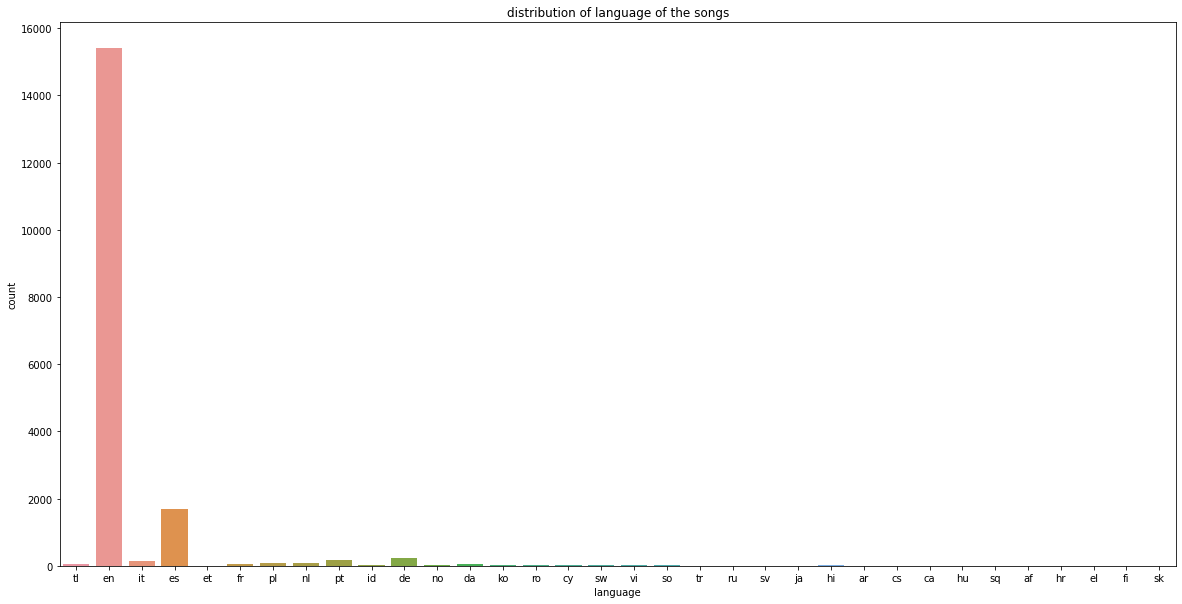

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='language', data=df)
plt.title('distribution of language of the songs')

In [ ]:
dfen = df[df['language'] == 'en']

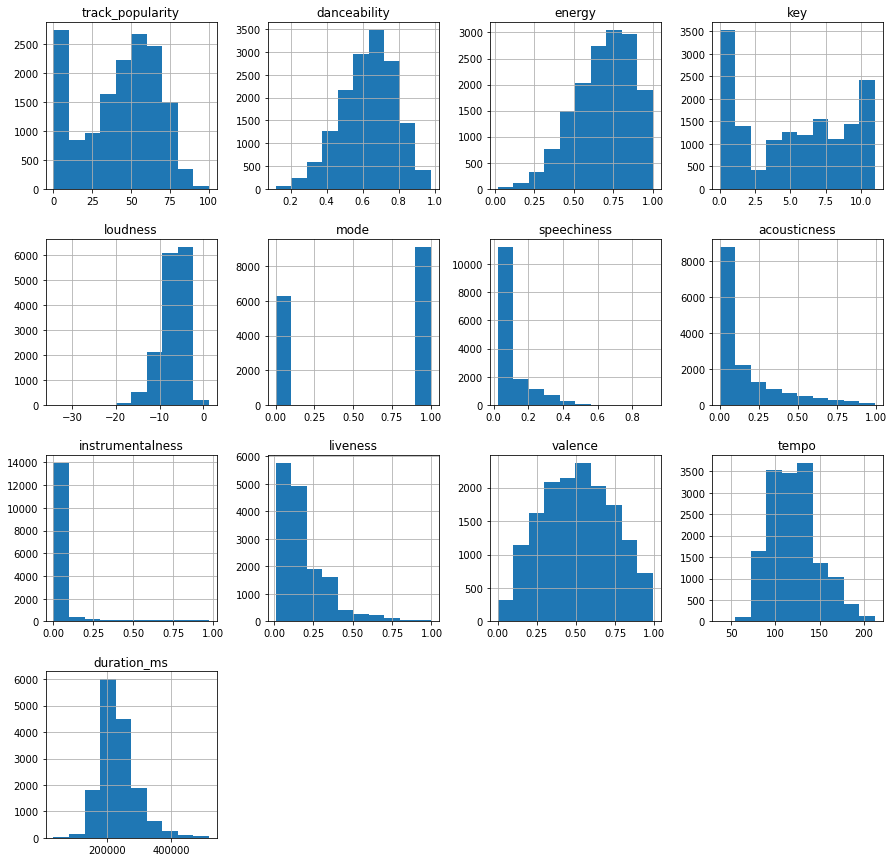

In [ ]:
dfen.hist(figsize = (15,15))
plt.show()

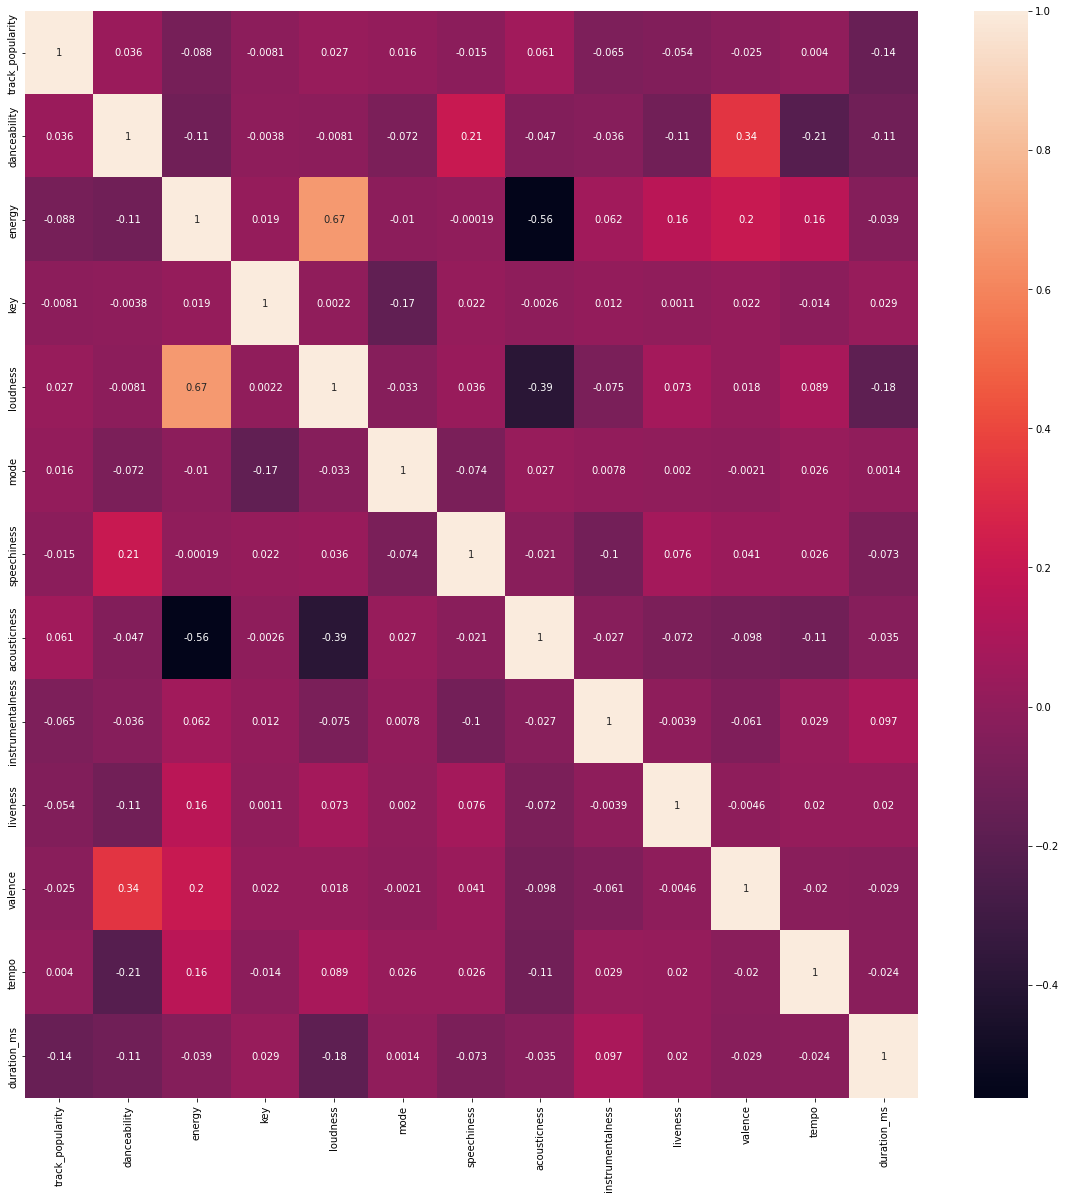

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dfen.corr(), annot=True)

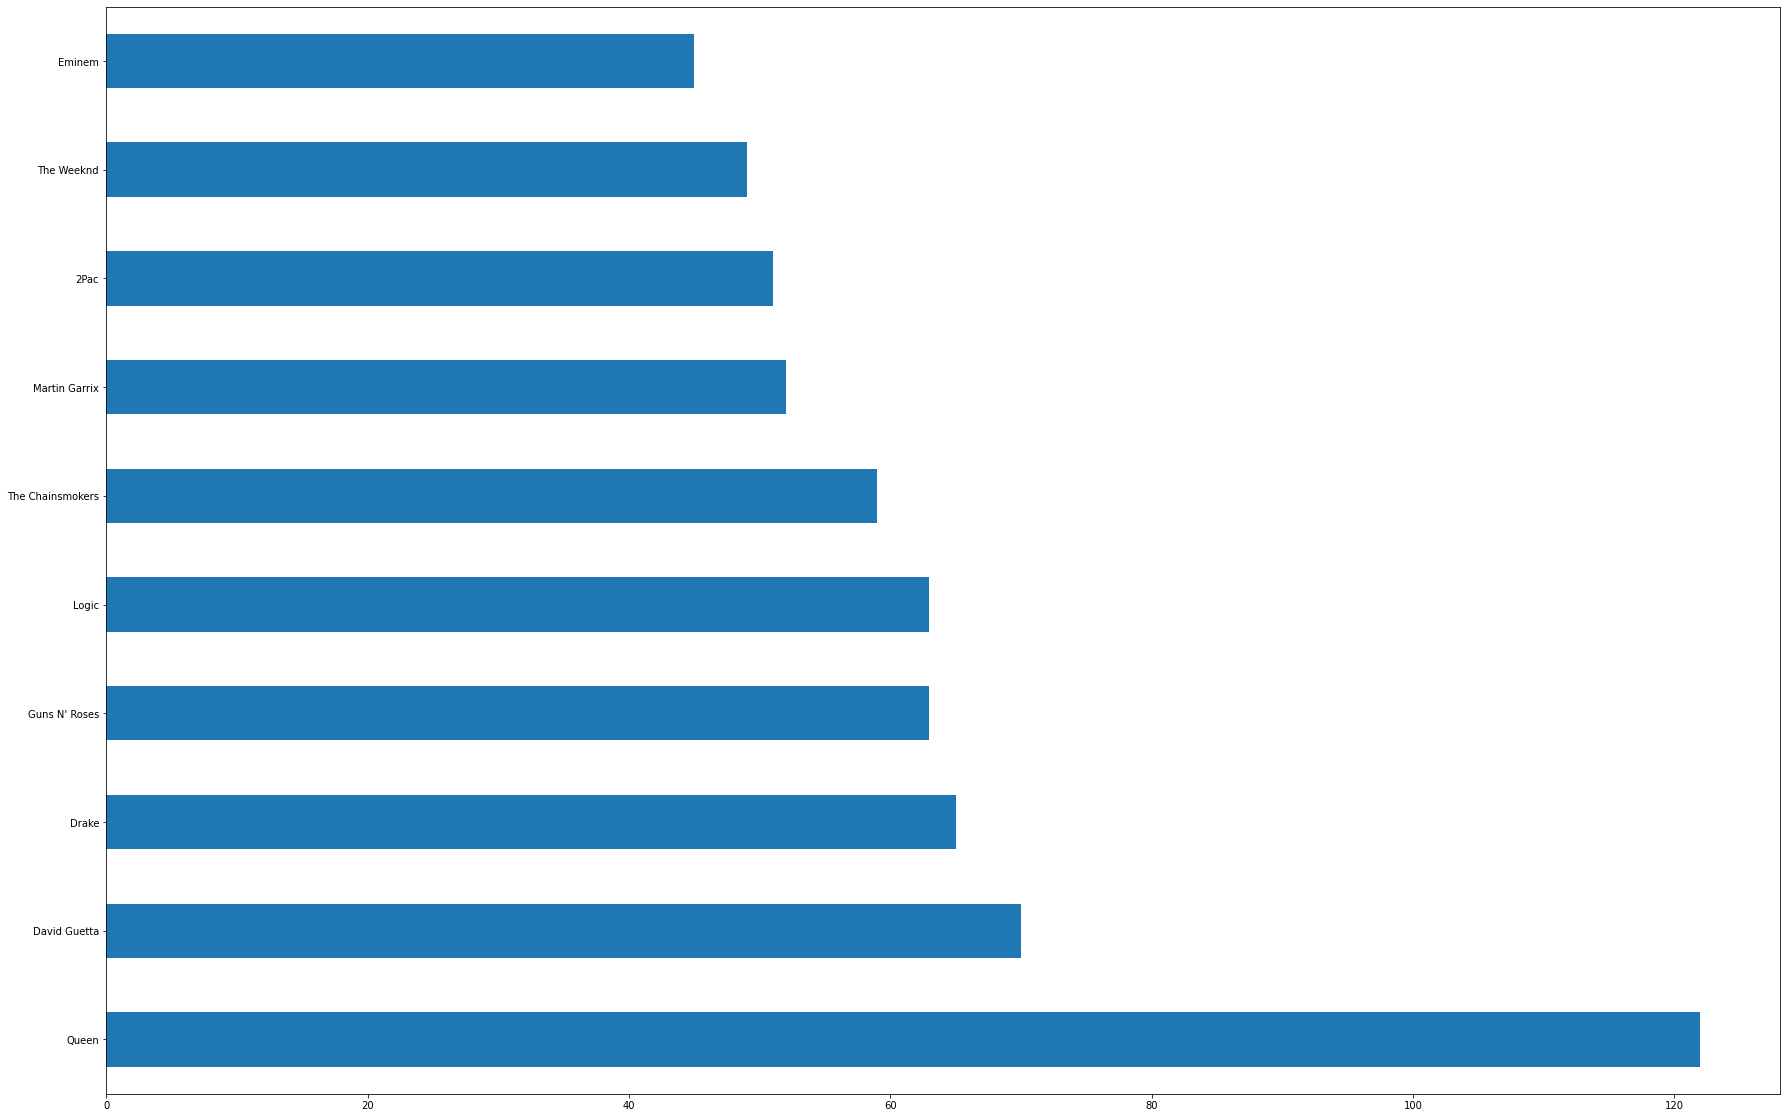

In [ ]:
dfen['track_artist'].value_counts().head(10).plot(kind='barh')

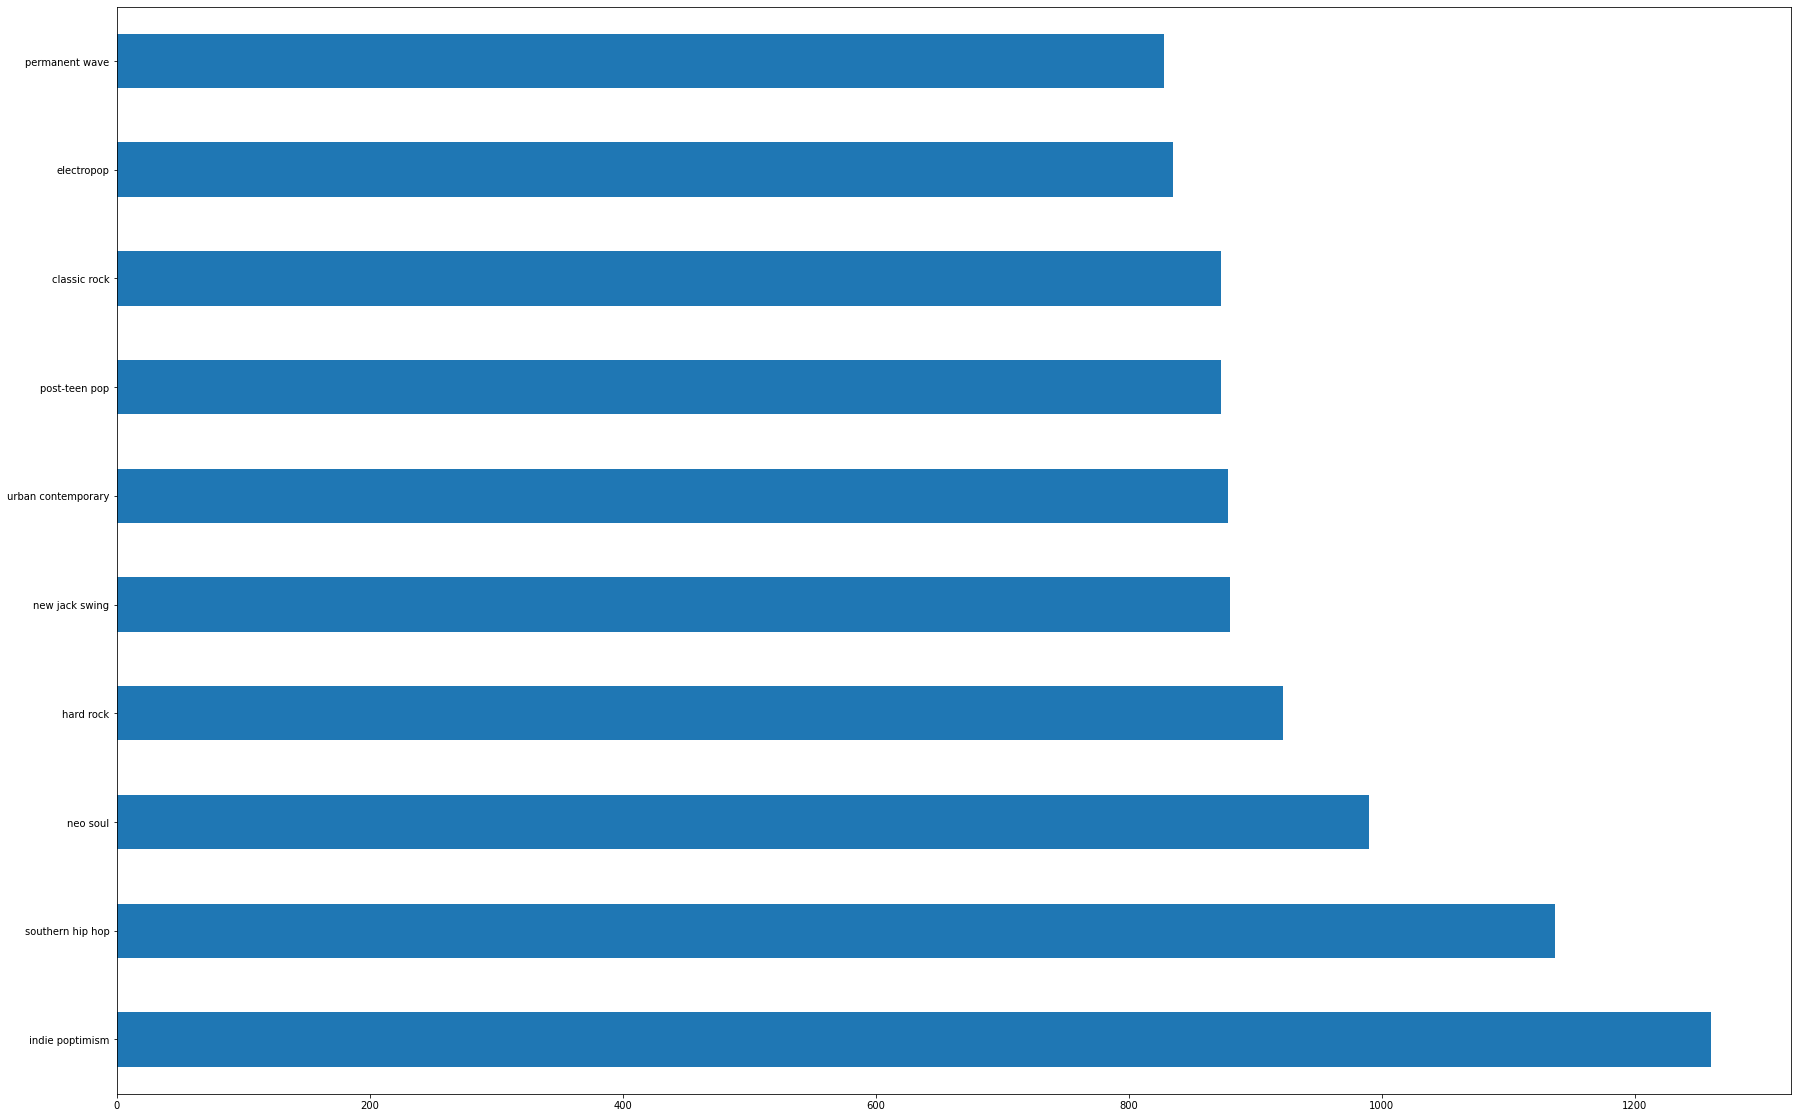

In [ ]:
dfen['playlist_subgenre'].value_counts().head(10).plot(kind='barh')

In [ ]:
dfen = dfen.sort_values('track_popularity', ascending = False)
dfen

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
6925,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,"They say, ""Oh my God, I see the way you shine ...",100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,...,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438,en
14477,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,"All for the 'Gram Bitches love the 'Gram Oh, w...",99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,...,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636,en
4813,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,"Oh, oh, oh Oh, oh, oh Oh, oh, oh, oh, oh We ...",98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,...,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280,en
1754,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own ...,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,...,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,en
1375,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,Pullin' out the coupe at the lot Told 'em fuck...,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,...,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14920,6FSTE58Y4IDxTj8vbfHQc6,Do What You Do,Jermaine Jackson,I don't mind Why don't you do what you do When...,0,6i9nQ5QdCd0SWI702VfSKQ,Jermaine Jackson,1984,80s Pop & Rock Hits and Album Tracks,0XOIK4m26aeYSD61E5nSVW,...,-11.921,0,0.0302,0.77800,0.000002,0.1530,0.537,112.500,287000,en
6217,2OmjhVnagJ8SVJDbj9eWrL,Sanctified,Rick Ross,NA There's a field with angels movin' around m...,0,4gK53NWTrdiH2ZyEX2ZpGL,Mastermind (Deluxe),2014-01-01,Contemporary Hip Hop,68y3WoFJMMKDHUIpqCnoM3,...,-6.293,1,0.0692,0.08150,0.000000,0.3820,0.228,125.990,289627,en
10647,4kmyLqkQTXOnieksRIEkiF,Groove Me,Guy,Groove me...baby...tonight! When I get you hom...,0,7bmp1NHVq0lgm0KQJzJdz7,The Very Best Of Guy,2002-01-01,90's NEW JACK SWING,0dmInkymNnOTWvEFamSNzb,...,-6.344,1,0.1110,0.05450,0.000000,0.5360,0.758,107.955,274135,en
6212,2OkU57LVQoynnVyLE1LrPN,Renaissance (feat. Clairity),Steve James,"You left me in the worst way Heart torn, leavi...",0,6YJNhpzylk2z8sJxvHGn2M,Renaissance (feat. Clairity),2015-11-30,@deniceemoberg EDM - POP REMIXES,2fbrY1tuoW8Uji14H7623k,...,-8.337,1,0.0478,0.52300,0.000823,0.0685,0.576,119.584,178996,en


In [ ]:
dfen.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000
mean,41.874846,0.631978,0.689391,5.318403,-6.867543,0.591496,0.101894,0.166545,0.044275,0.189441,0.510665,120.788942,233009.975852
std,24.666788,0.151037,0.183478,3.610079,2.954230,0.491573,0.099983,0.217371,0.149590,0.151454,0.226108,27.182498,57573.749788
min,0.000000,0.116000,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,23.000000,0.533000,0.565000,2.000000,-8.426000,0.000000,0.038700,0.013200,0.000000,0.092800,0.337000,99.986000,195463.000000
50%,47.000000,0.645000,0.712000,5.000000,-6.330000,1.000000,0.057200,0.070200,0.000012,0.129000,0.510000,120.059000,223933.000000
75%,61.000000,0.742000,0.835000,8.000000,-4.766000,1.000000,0.121000,0.234000,0.002010,0.248000,0.685000,135.680000,261360.000000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.974000,0.996000,0.991000,212.137000,517125.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most popular artists')

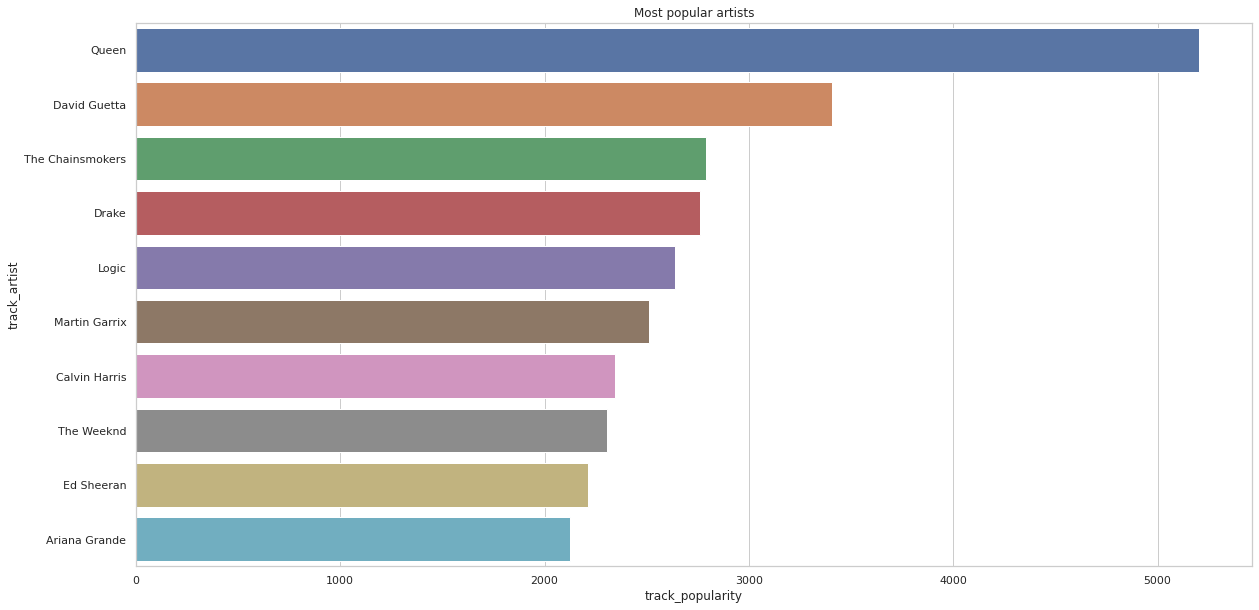

In [ ]:
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
x = dfen.groupby('track_artist')['track_popularity'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x,x.index)
plt.title('Most popular artists')

In [ ]:
dfgroup = dfen.groupby(['track_artist'], as_index = False).sum().sort_values('track_popularity', ascending=False)
top10artist = dfgroup['track_artist'].head(10).tolist()
top10artist

['Queen',
 'David Guetta',
 'The Chainsmokers',
 'Drake',
 'Logic',
 'Martin Garrix',
 'Calvin Harris',
 'The Weeknd',
 'Ed Sheeran',
 'Ariana Grande']

In [ ]:
dfentop10 = dfen[dfen['track_artist'].isin(top10artist)]
dfentop10

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
1754,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own ...,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,...,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,en
12097,57vxBYXtHMk6H1aD29V7PU,Heartless,The Weeknd,"Young Metro, young Metro, young Metro (Sheesh)...",93,7vRcickwa6GCfY1qKKe4lK,Heartless,2019-11-27,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,...,-5.831,0,0.1110,0.00632,0.000076,0.1170,0.198,169.954,200080,en
11508,4vUmTMuQqjdnvlZmAH61Qk,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,"She got the mmm, brown eyes, caramel thighs Lo...",91,3oIFxDIo2fwuk4lwCmFZCx,No.6 Collaborations Project,2019-07-12,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,...,-6.376,0,0.0824,0.14800,0.000000,0.0865,0.668,97.986,204467,en
15631,6ocbgoVGwYJhOv1GgI9NsF,7 rings,Ariana Grande,"Yeah, breakfast at Tiffany's and bottles of bu...",90,2fYhqwDWXjbpjaIJPEfKFw,"thank u, next",2019-02-08,Intro to Post-Teen Pop,6o6MNYZqHSkMAKcCHPNu7K,...,-10.732,0,0.3340,0.59200,0.000000,0.0881,0.327,140.048,178627,en
8064,3HVWdVOQ0ZA45FuZGSfvns,I Don't Care (with Justin Bieber),Ed Sheeran,I'm at a party I don't wanna be at And I don't...,90,5Nux7ozBJ5KJ02QYWwrneR,I Don't Care (with Justin Bieber),2019-05-10,indie poptimism🕺🏻,6MQeEHHDs6HQkN5Dlj3oKo,...,-5.041,1,0.0442,0.09120,0.000000,0.0894,0.842,101.956,219947,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,1HzTvjlL2z1ok5QzfDvPrp,It's your life (feat. Chris Willis),David Guetta,You must be living in a fantacy You've got me ...,0,3tBZoofBxnP0BvdeagB2Si,One Love,2009-08-24,Electro/Progressive/Club House,1HtnPDj2V126xB9tJP786P,...,-5.983,1,0.1220,0.04630,0.000390,0.4370,0.108,127.995,225000,en
3243,1GJLqaSf3YAHzHlnrFjeCS,This Is What You Came For - Dillon Francis Remix,Calvin Harris,"Baby, this is what you came for Lightning stri...",0,6ge4fGvdDS4VGR0tl8VJx1,This Is What You Came For (Remixes),2016-06-17,EDM - pop remixes,0cvVad4XizGbOS0vlwZYS5,...,-2.862,0,0.0476,0.01370,0.000602,0.1270,0.474,139.978,223000,en
12457,5dJw4bL9BziBStitvelyAS,Don't Let Me Down - W&W Remix,The Chainsmokers,"Crashing, hit a wall Right now I need a miracl...",0,0aLh3CKo8kz7J6CIySrqVC,Don't Let Me Down (Remixes),2016-05-27,Hands Up‏‏​​ ‍,1lSdljPk8zcAdXVMUduDia,...,-5.677,0,0.1210,0.04100,0.001280,0.1140,0.484,159.897,195453,en
16781,76P07ei8drjrenqtvDbefy,Hotline Bling,Drake,"You used to call me on my You used to, you use...",0,2e42oY2oFArkkTENT8UVXD,Views,2016-05-06,BALLARE - رقص,1CMvQ4Yr5DlYvYzI0Vc2UE,...,-8.039,1,0.0596,0.00287,0.000440,0.0484,0.572,134.972,267187,en


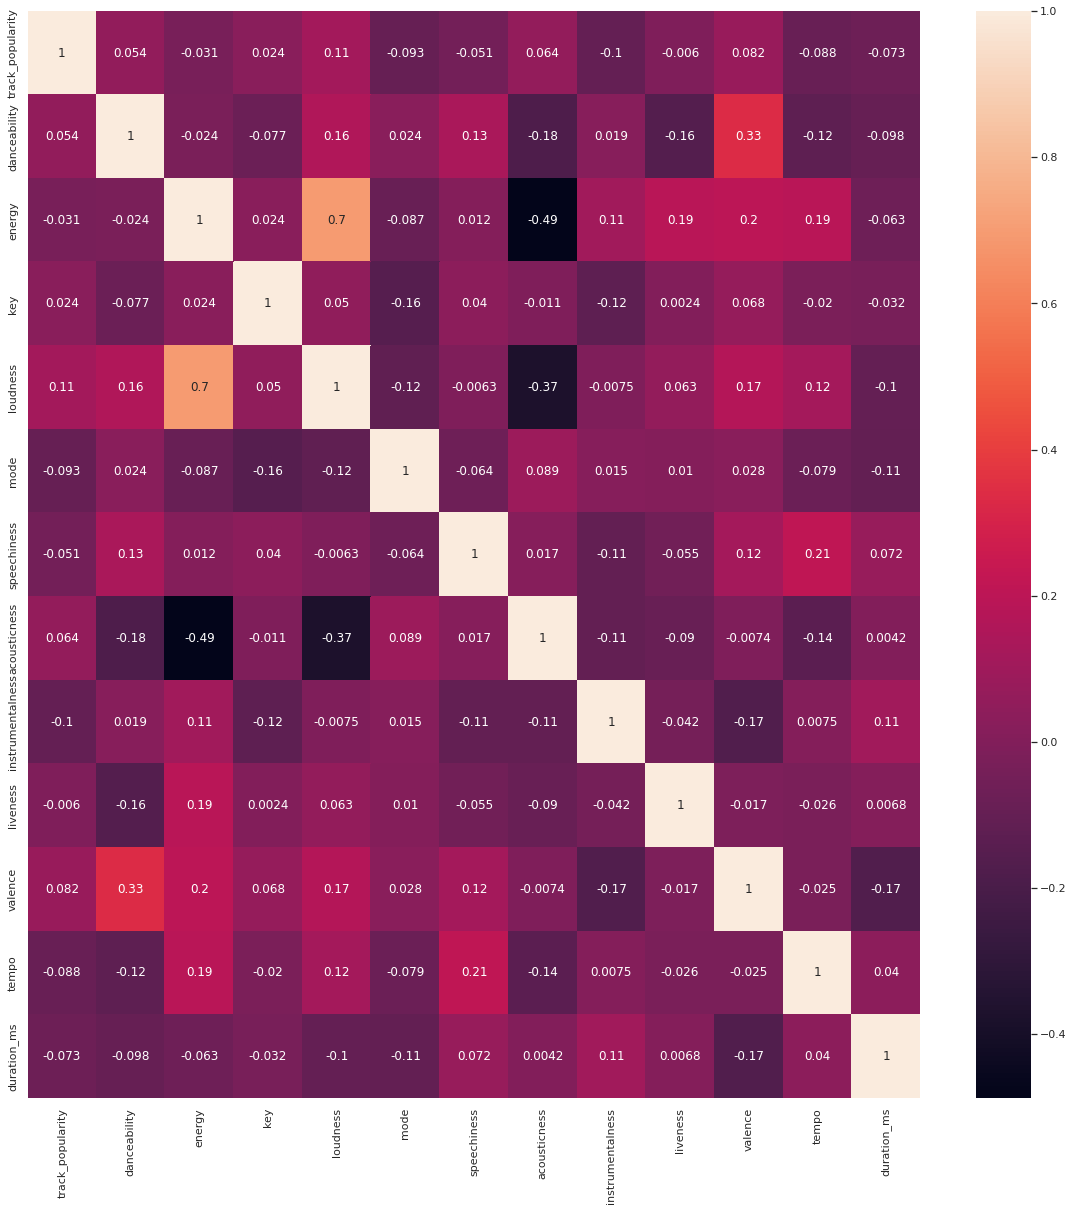

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dfentop10.corr(), annot=True)

In [ ]:
dfentop10.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,47.242070,0.619334,0.693910,5.021703,-6.245706,0.545910,0.096210,0.169383,0.027362,0.197365,0.429013,122.424629,226739.756260
std,24.699935,0.158457,0.179917,3.666425,2.493120,0.498304,0.088236,0.205135,0.121418,0.146759,0.203992,25.982525,57104.533549
min,0.000000,0.155000,0.045500,0.000000,-17.515000,0.000000,0.023200,0.000107,0.000000,0.009360,0.035000,62.484000,37640.000000
25%,33.000000,0.512500,0.572500,1.000000,-7.375000,0.000000,0.040900,0.023700,0.000000,0.101000,0.283000,103.996000,194717.000000
50%,52.000000,0.628000,0.717000,5.000000,-5.900000,1.000000,0.058300,0.091200,0.000007,0.134000,0.410000,125.014000,217387.000000
75%,66.500000,0.732500,0.844000,8.000000,-4.604500,1.000000,0.116000,0.227000,0.000466,0.261000,0.567000,134.177000,249120.000000
max,98.000000,0.933000,0.995000,11.000000,-0.475000,1.000000,0.529000,0.952000,0.963000,0.854000,0.970000,203.585000,500960.000000


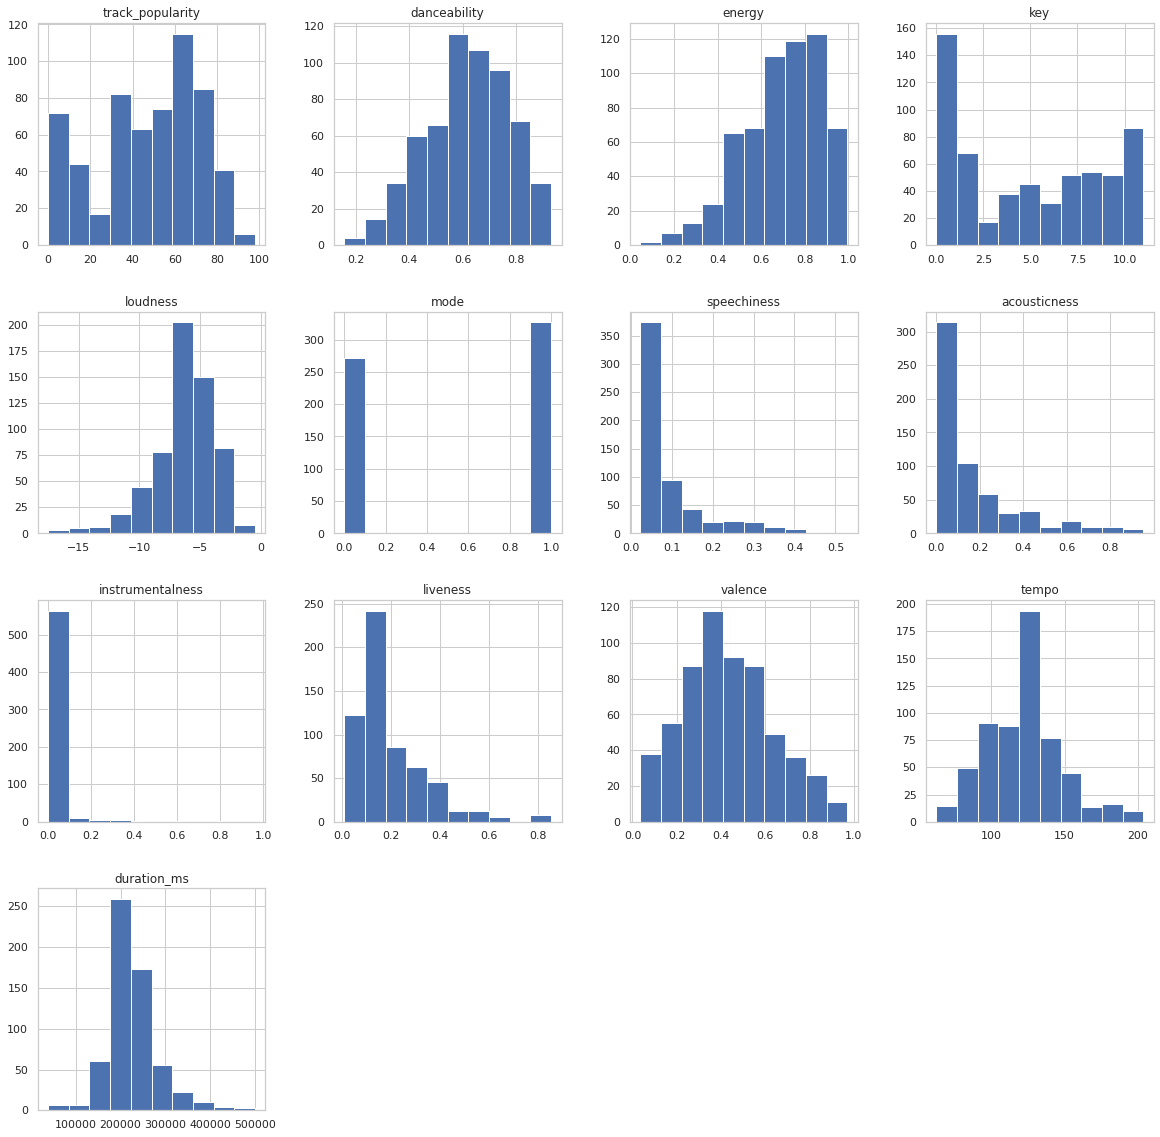

In [ ]:
dfentop10.hist(figsize = (20,20))
plt.show()

In [ ]:
parameter = dfentop10.select_dtypes(include=['int64', 'float']).columns
parameter

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

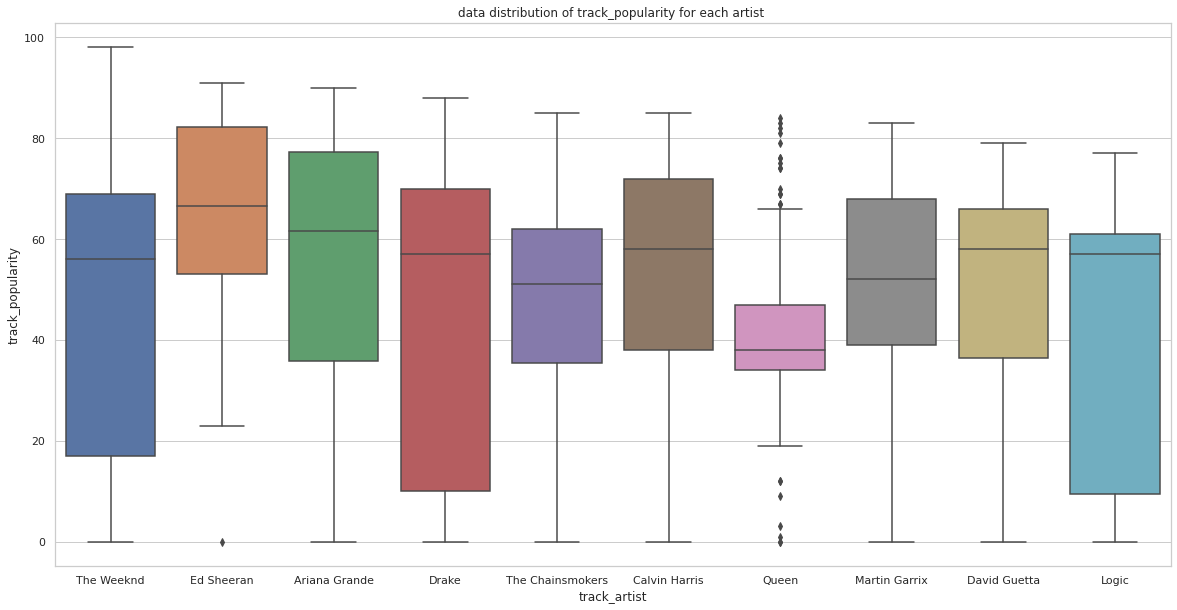

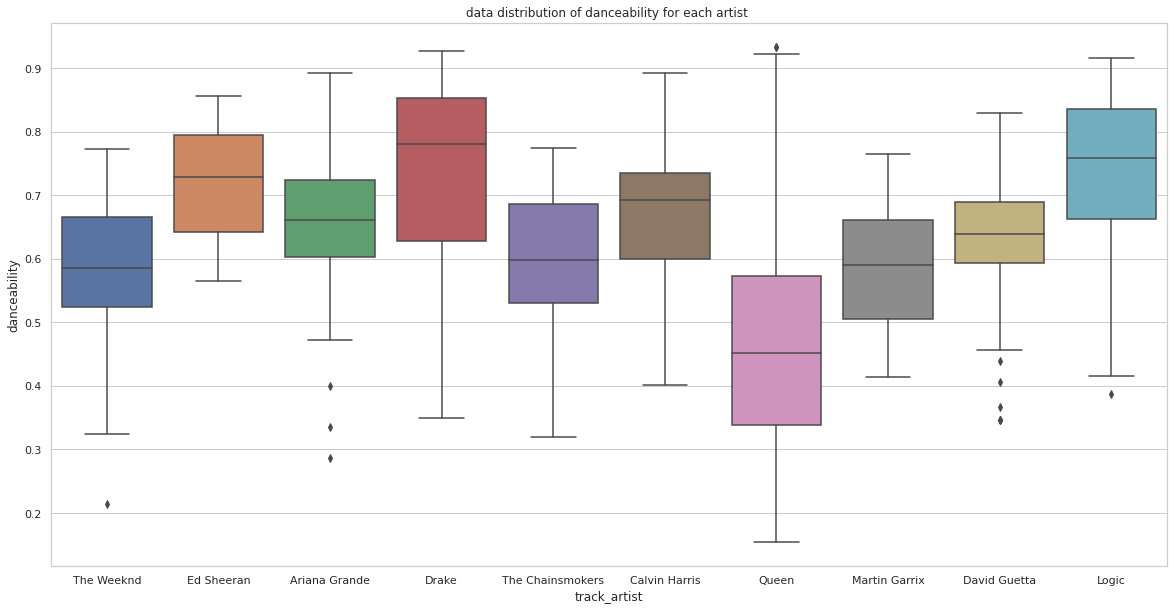

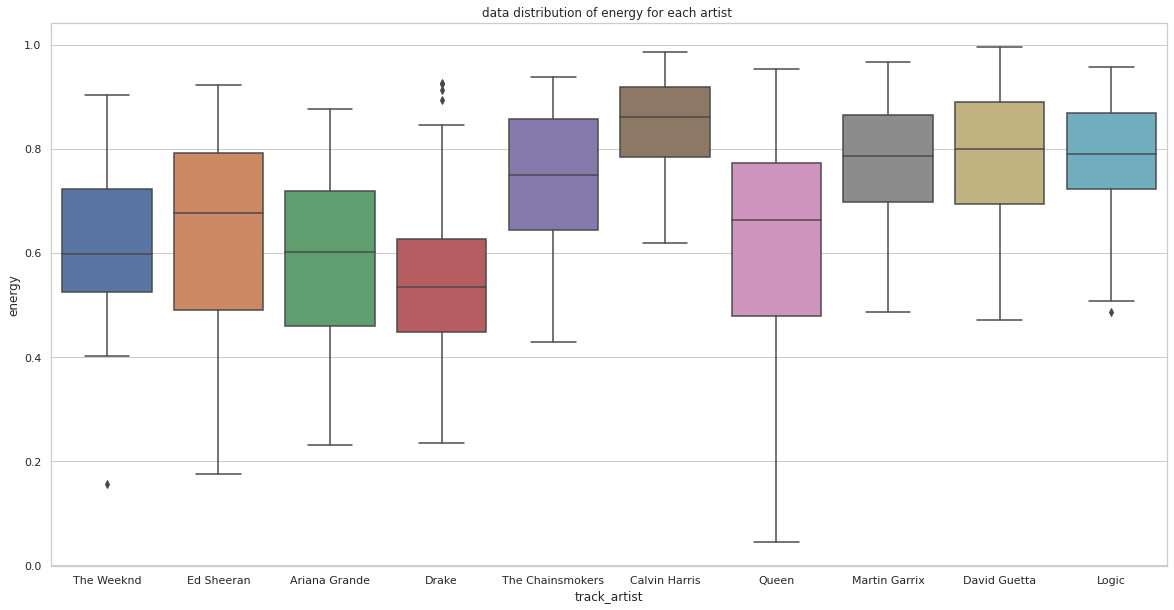

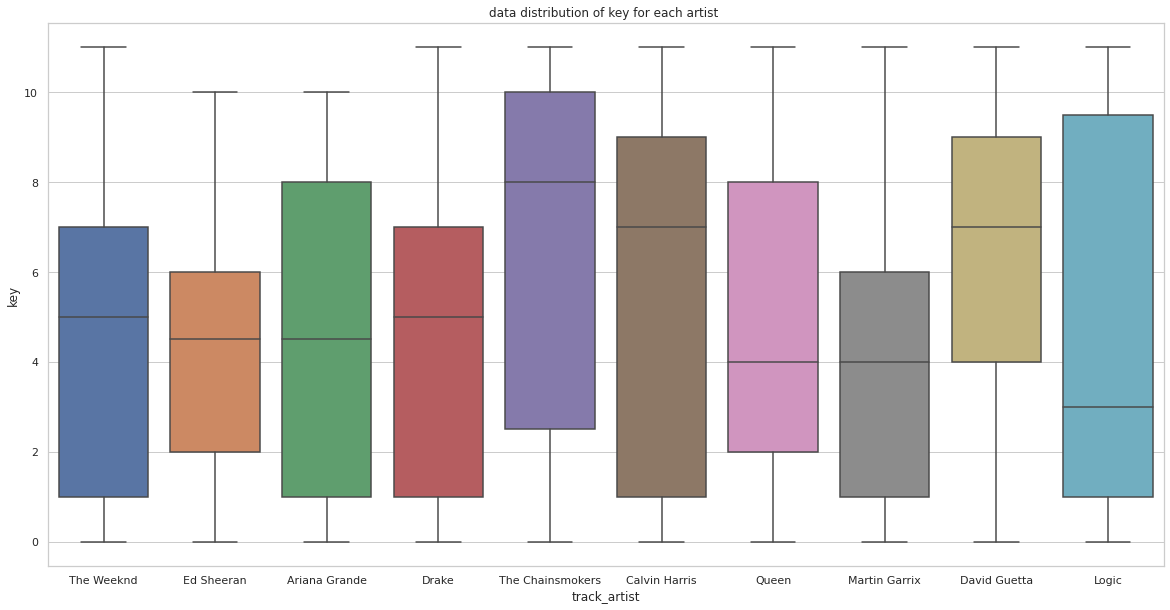

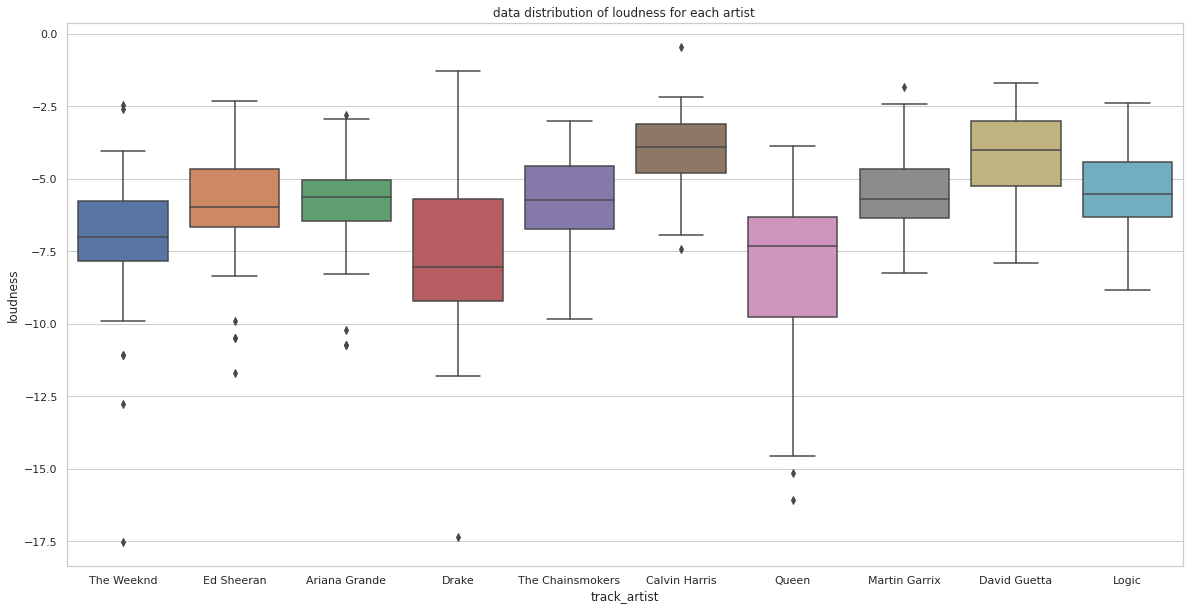

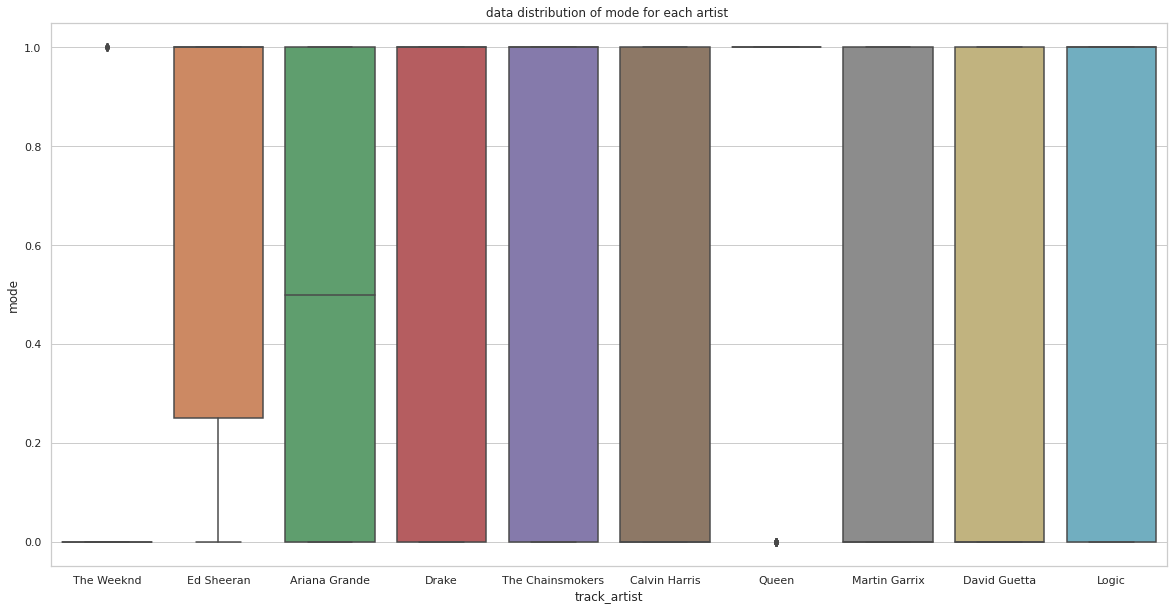

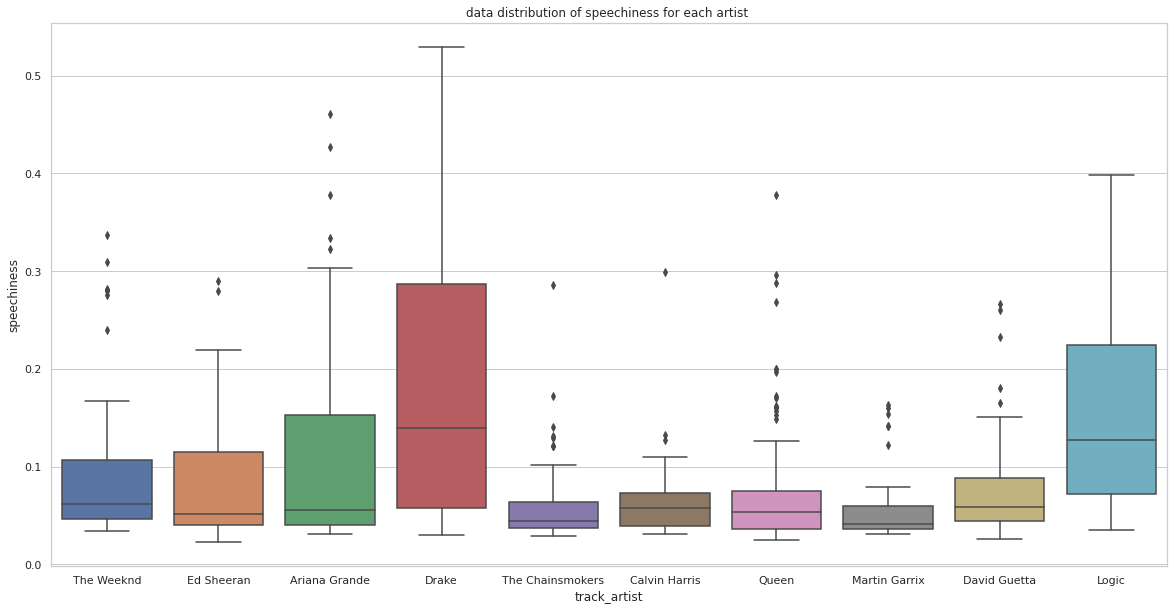

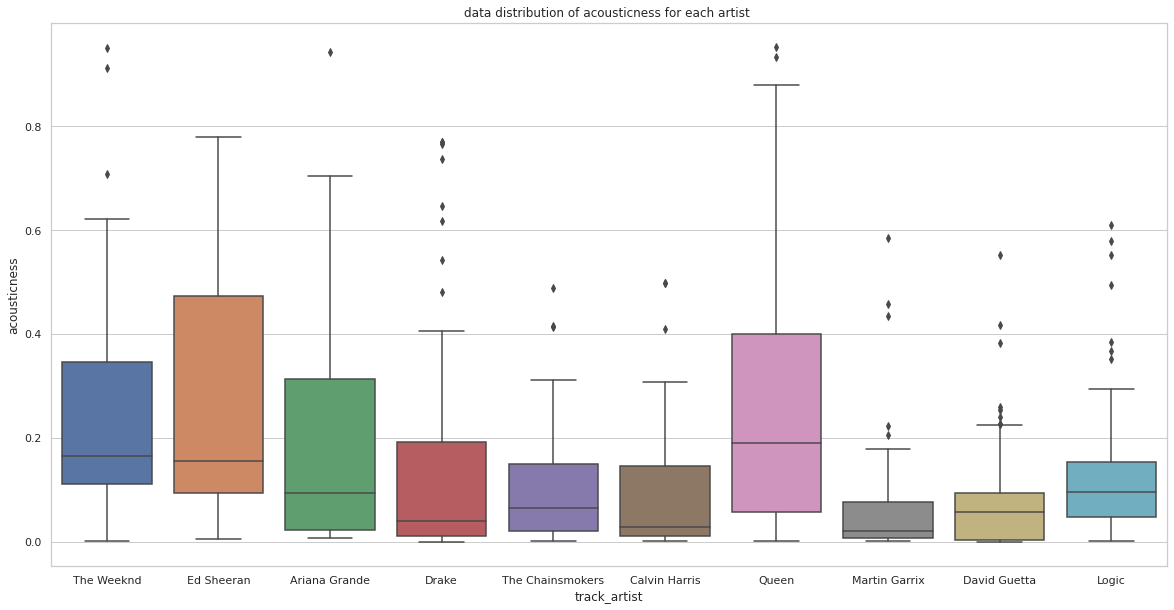

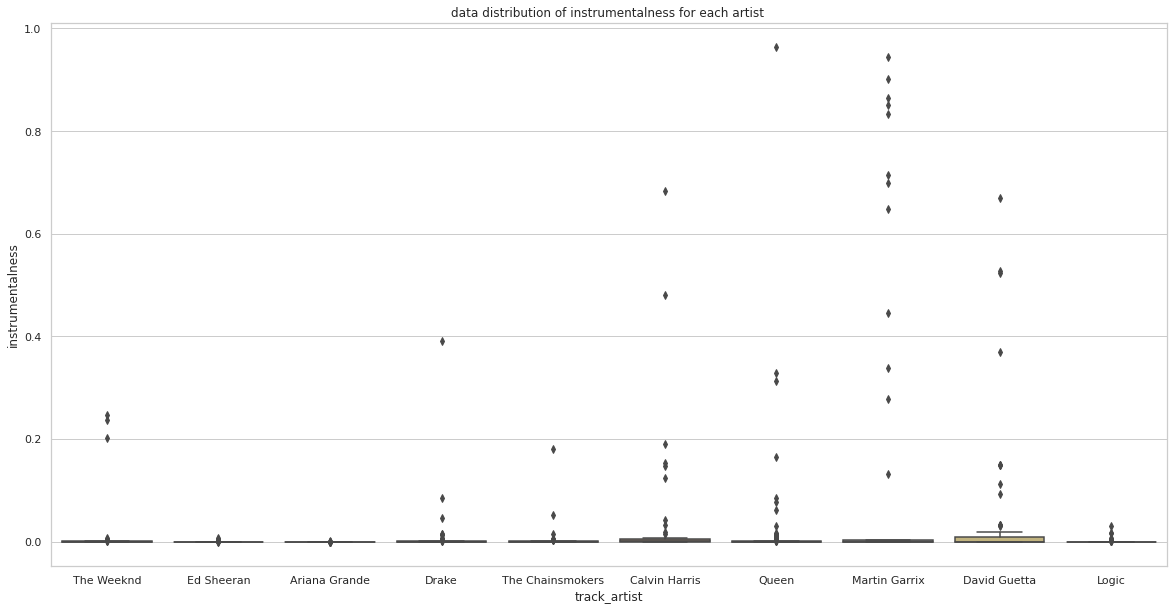

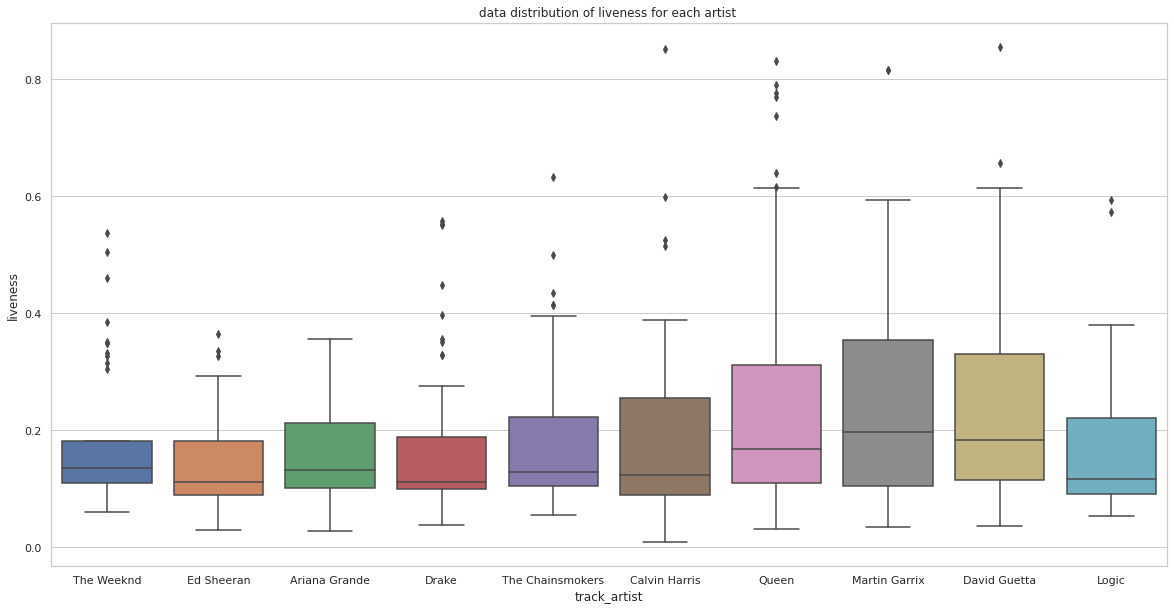

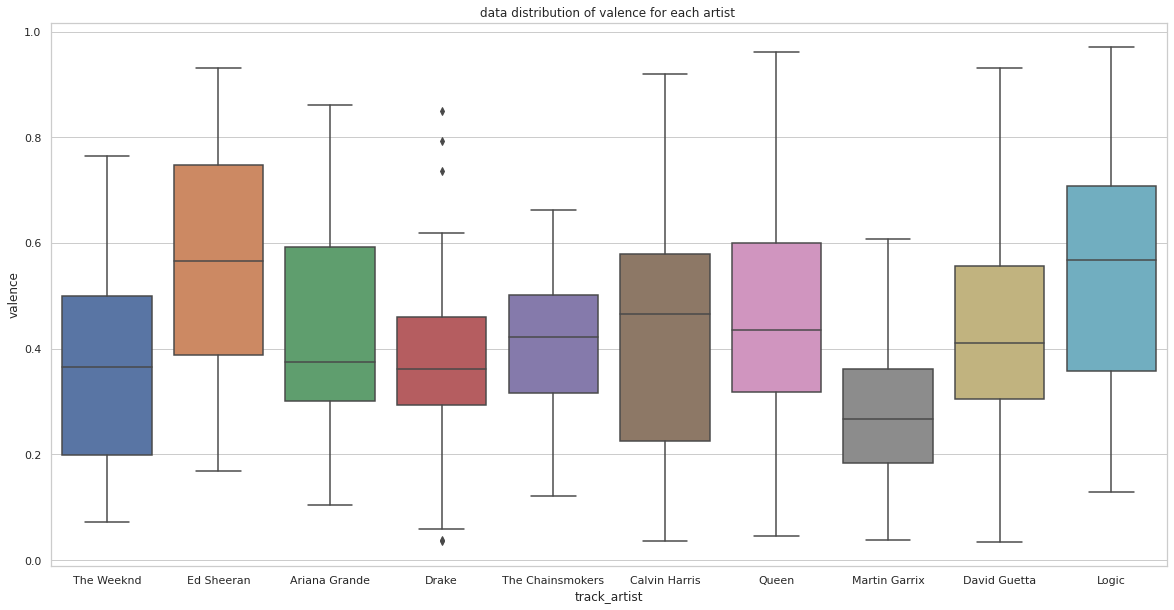

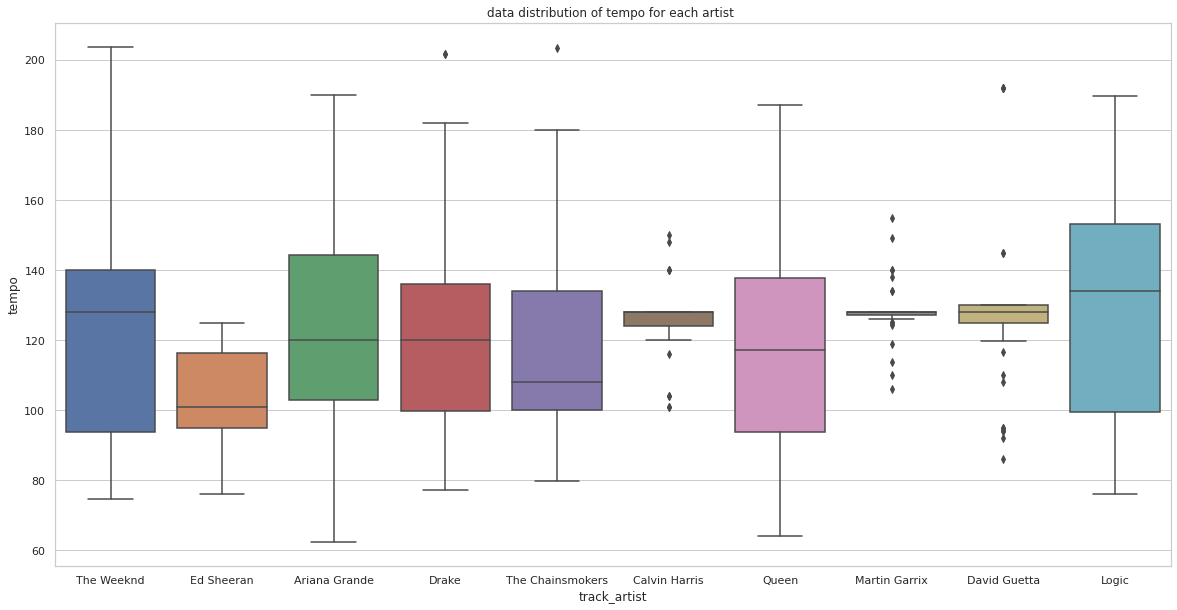

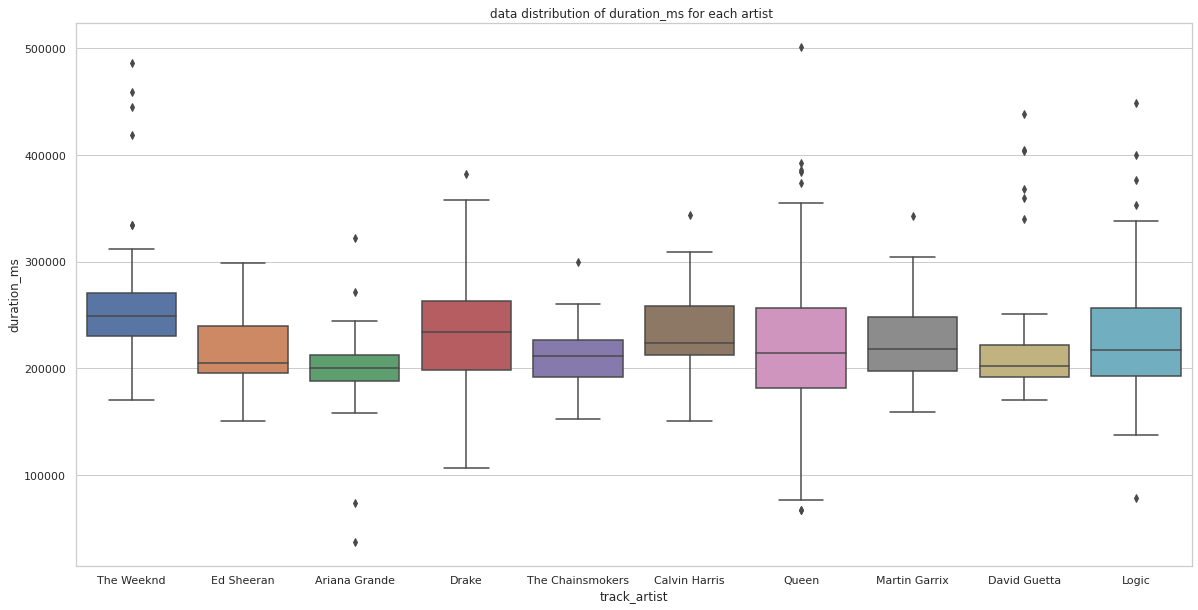

In [ ]:
for i in parameter:
    plt.figure(figsize=(20,10))
    sns.boxplot(x='track_artist', y=i, data=dfentop10)
    plt.title(f'data distribution of {i} for each artist ')

## analysing the text based columns now

In [ ]:
dfen['track_artist'].sample(10)

1323                  Ne-Yo
3173              Toploader
9041     Black Stone Cherry
3309              Maor Levi
16341            Apollo LTD
13025         Amy Winehouse
543            Mariah Carey
18074      The Human League
11281         Billie Eilish
2064                 Calboy
Name: track_artist, dtype: object

In [ ]:
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [ ]:
df.describe(include='all')

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
count,18194,18194,18194,18194,18194.000000,18194,18194,18194,18194,18194,...,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194.000000,18194
unique,18194,14975,5946,15977,NaN,14073,12497,3786,441,463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
top,0017A6SJgTbfQVU2EtsPNo,Poison,Queen,Lyrics for this song have yet to be released. ...,NaN,6TBwXfQCeLoVIOW53dNLqz,Greatest Hits,2013-01-01,Indie Poptimism,37i9dQZF1DWTHM4kX49UKs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
freq,1,12,123,48,NaN,16,108,162,256,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15405
mean,NaN,NaN,NaN,NaN,42.504562,NaN,NaN,NaN,NaN,NaN,...,-6.752138,0.582280,0.106312,0.174424,0.043411,0.189347,0.522838,120.809299,230591.541882,NaN
std,NaN,NaN,NaN,NaN,24.663300,NaN,NaN,NaN,NaN,NaN,...,2.894560,0.493197,0.102416,0.215997,0.150668,0.153377,0.227645,27.635937,56780.265327,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,...,-8.220000,0.000000,0.039600,0.016300,0.000000,0.092700,0.347000,98.579750,193609.250000,NaN
50%,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,...,-6.221500,1.000000,0.060200,0.082300,0.000007,0.128000,0.524000,120.028500,221498.000000,NaN
75%,NaN,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,...,-4.717000,1.000000,0.131000,0.252000,0.001370,0.246000,0.702000,136.017750,258090.250000,NaN


In [ ]:
dfen.describe(include='all')

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
count,15405,15405,15405,15405,15405.000000,15405,15405,15405,15405,15405,...,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405
unique,15405,12513,4936,13415,NaN,11776,10388,3485,401,423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,2XU0oxnq2qxCpomAAuJY8K,Poison,Queen,Lyrics for this song have yet to be released. ...,NaN,6GeHCNwwqMMUrpxuGTRYcf,Greatest Hits,2013-01-01,Indie Poptimism,3E88dLx4fgFYY70gdGzdnB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
freq,1,12,122,48,NaN,16,107,142,254,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15405
mean,NaN,NaN,NaN,NaN,41.874846,NaN,NaN,NaN,NaN,NaN,...,-6.867543,0.591496,0.101894,0.166545,0.044275,0.189441,0.510665,120.788942,233009.975852,NaN
std,NaN,NaN,NaN,NaN,24.666788,NaN,NaN,NaN,NaN,NaN,...,2.954230,0.491573,0.099983,0.217371,0.149590,0.151454,0.226108,27.182498,57573.749788,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000,NaN
25%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,...,-8.426000,0.000000,0.038700,0.013200,0.000000,0.092800,0.337000,99.986000,195463.000000,NaN
50%,NaN,NaN,NaN,NaN,47.000000,NaN,NaN,NaN,NaN,NaN,...,-6.330000,1.000000,0.057200,0.070200,0.000012,0.129000,0.510000,120.059000,223933.000000,NaN
75%,NaN,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,...,-4.766000,1.000000,0.121000,0.234000,0.002010,0.248000,0.685000,135.680000,261360.000000,NaN


In [ ]:
dfen['lyrics'].value_counts().head(15)

Lyrics for this song have yet to be released. Please check back once the song has been released.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

some lyrics are not available, while others are duplicates, let us first remove the missing ones

In [ ]:
dfen['lyrics'].replace('Lyrics for this song have yet to be released. Please check back once the song has been released.', None,inplace=True)
dfen.dropna(axis=0,inplace=True)
dfen.shape

(15405, 25)

In [ ]:
dfen['lyrics'].value_counts().head(10)

NA Yeah, Spyderman and Freeze in full effect Uh-huh You ready, Ron? I'm ready You ready, Biv? I'm ready, Slick, are you? Oh, yeah, break it down NA Girl, I, must (warn you) I sense something strange in my mind Situation is (serious) Let's cure it cause we're running out of time It's oh, so (beautiful) Relationships they seem from the start It's all so (deadly) When love is not together from the heart It's drivin' me out of my mind! That's why it's HARD for me to find Can't get it out of my head! Miss her, kiss her, love her(Wrong move you're dead!) That girl is (poison)...Never trust a big butt and smile That girl is (poison)..("POISON!!") NA (-caution) Before I start to meet a fly girl, you know? Cause in some (portions) You'll think she's the best thing in the world She's so - (fly) She'll drive you right out of your mind And steal your heart when you're blind Beware she's schemin', she'll make you think you're dreamin' YOU'LL fall in love and you'll be screamin', demon, HOO.. Poison

Text(0.5, 1.0, 'playlist genre distribution')

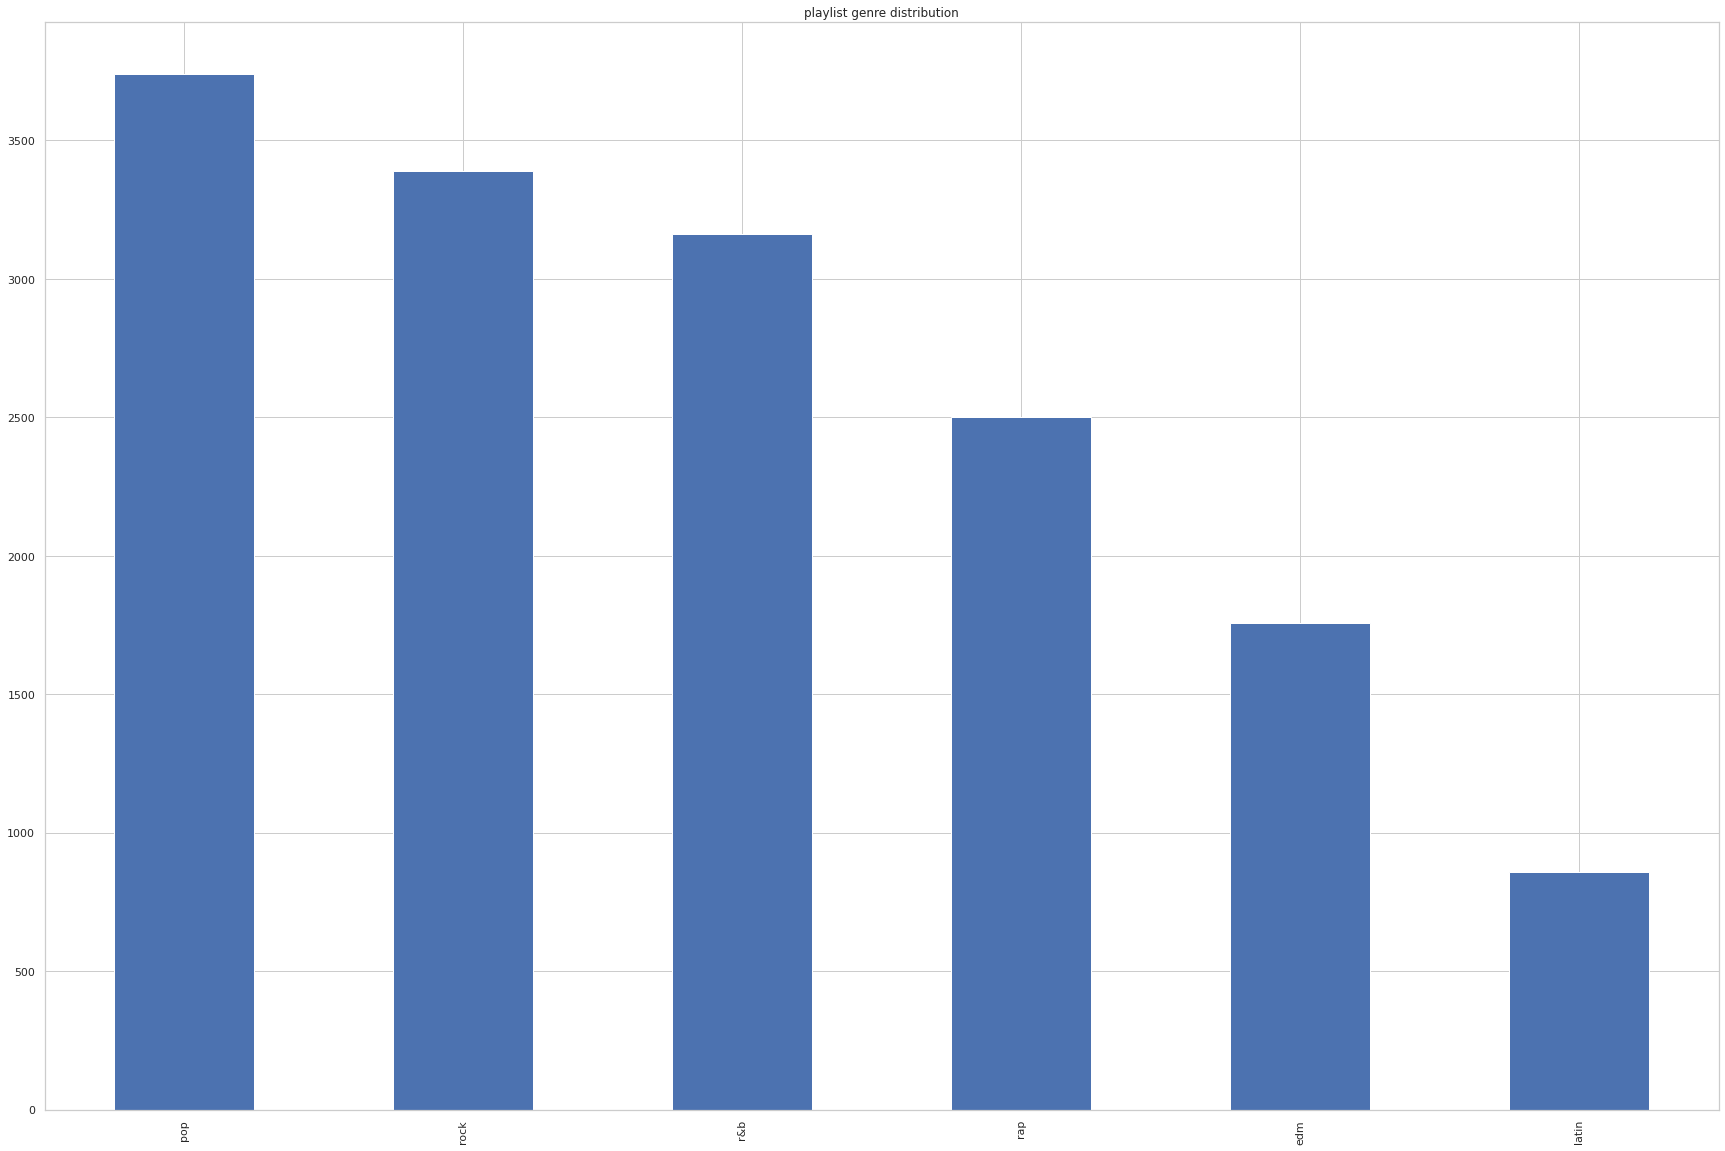

In [ ]:
dfen['playlist_genre'].value_counts().plot(kind='bar')
plt.title('playlist genre distribution')

Text(0.5, 1.0, 'playlist subgenre distribution')

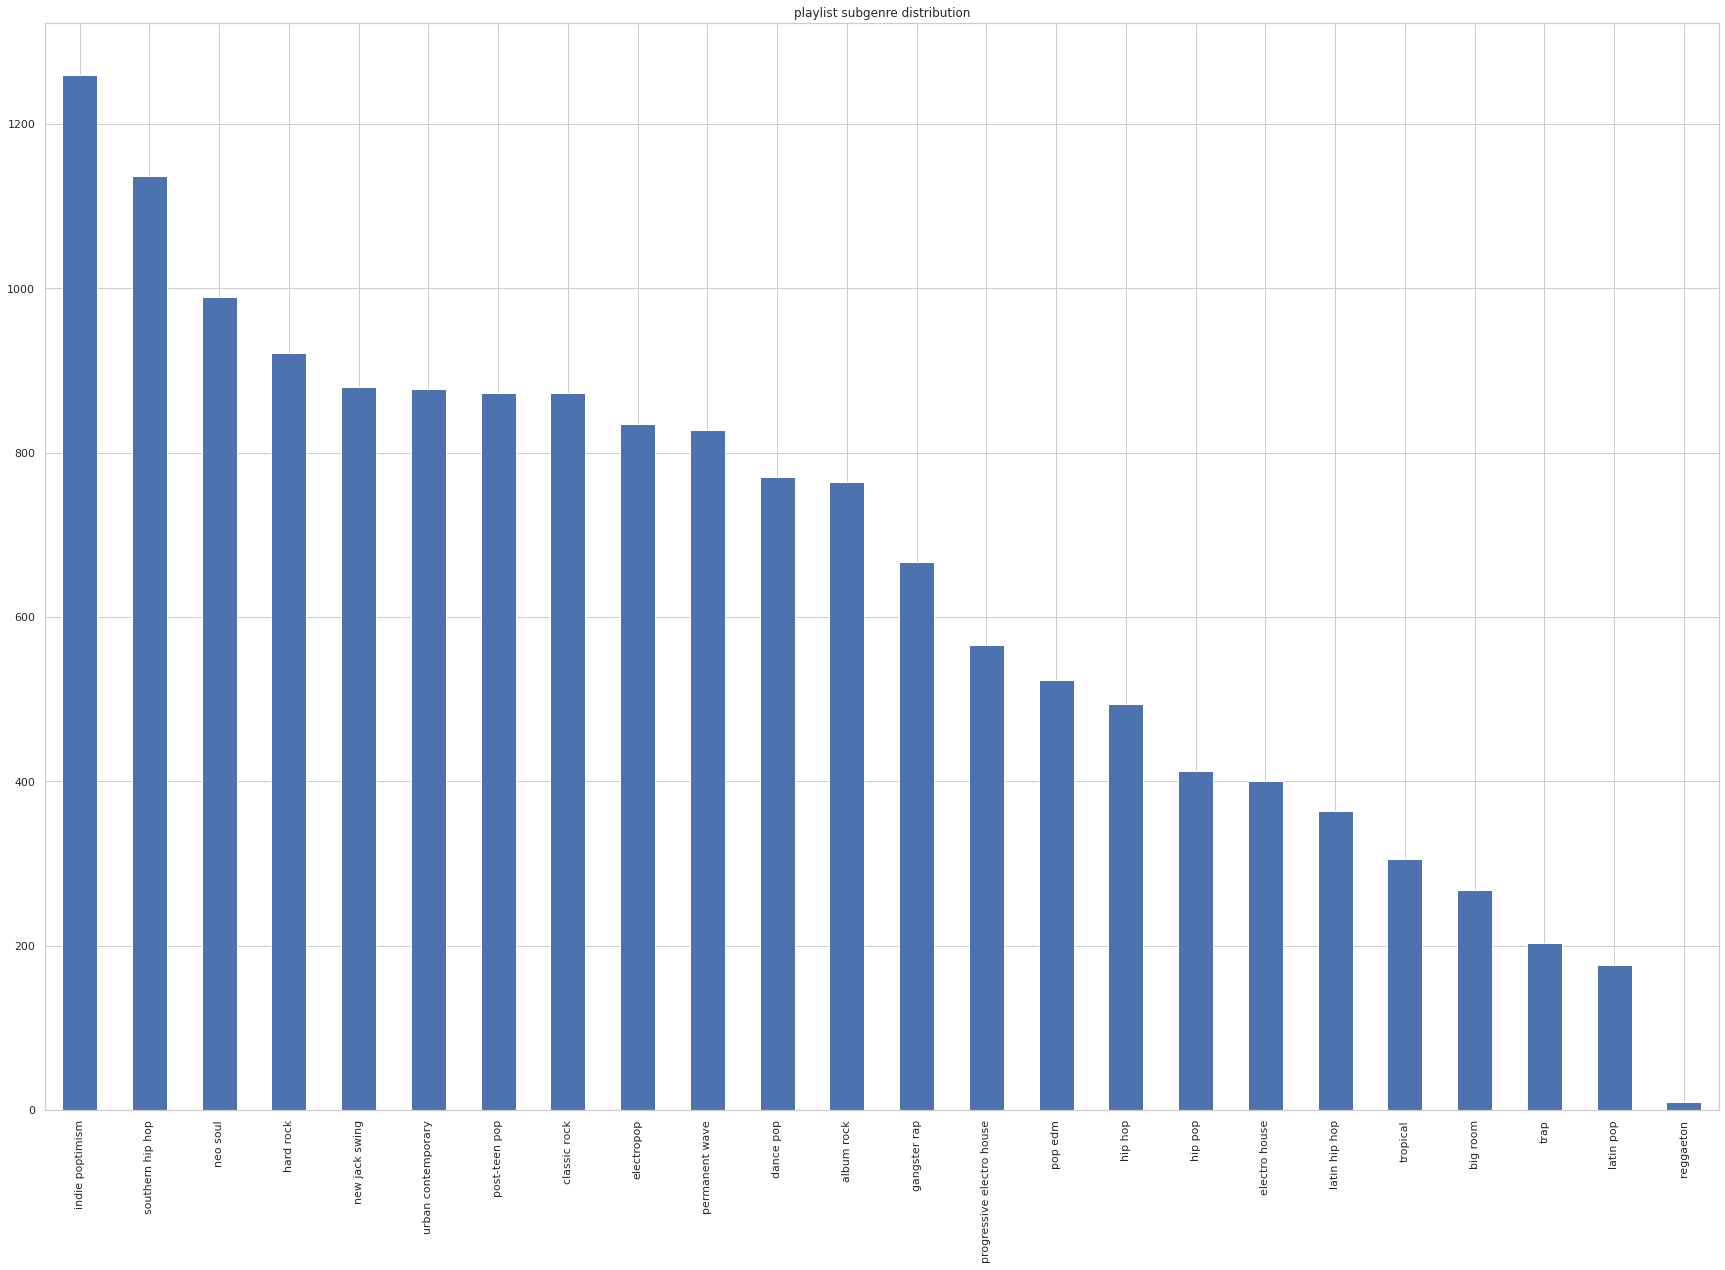

In [ ]:
dfen['playlist_subgenre'].value_counts().plot(kind='bar')
plt.title('playlist subgenre distribution')

most popular genres?

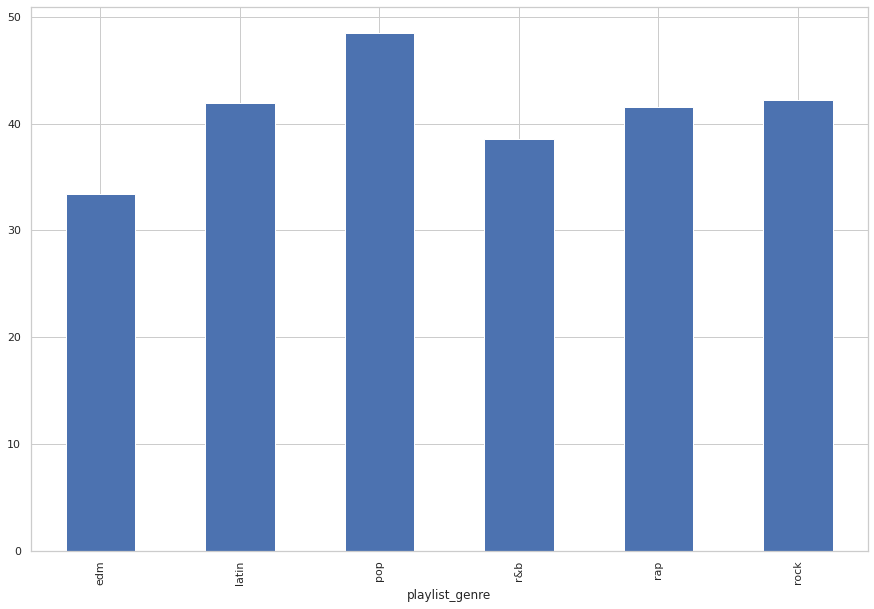

In [ ]:
dfen.groupby('playlist_genre')['track_popularity'].mean().plot(kind='bar',figsize=(15,10))

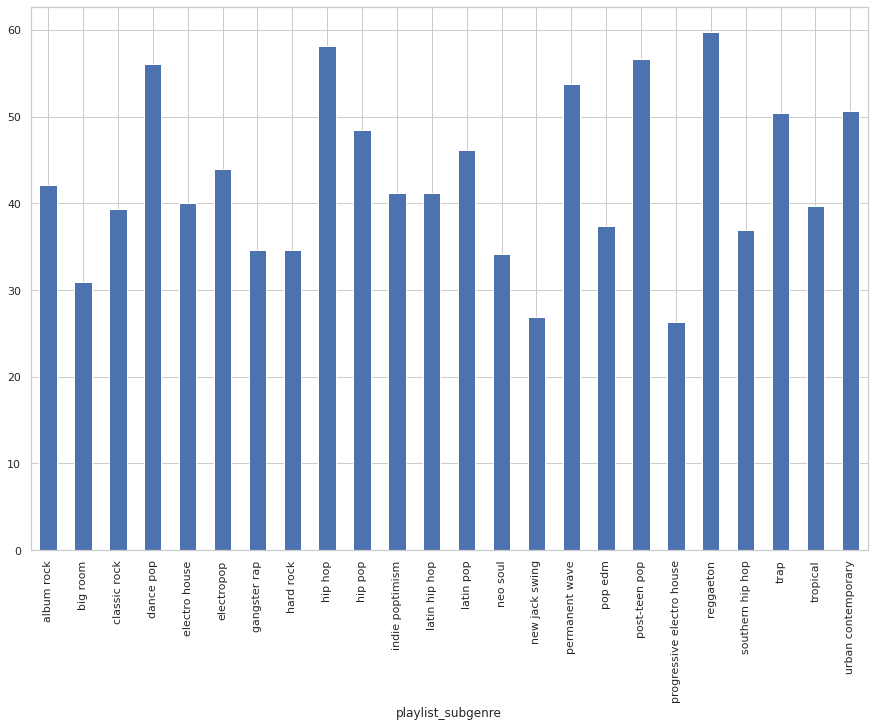

In [ ]:
dfen.groupby('playlist_subgenre')['track_popularity'].mean().plot(kind='bar',figsize=(15,10))

we can labelize the genres and subgenres and convert them into numerical columns

In [ ]:
dfen.dtypes

track_id                     object
track_name                   object
track_artist                 object
lyrics                       object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
language                     object
dtype: object

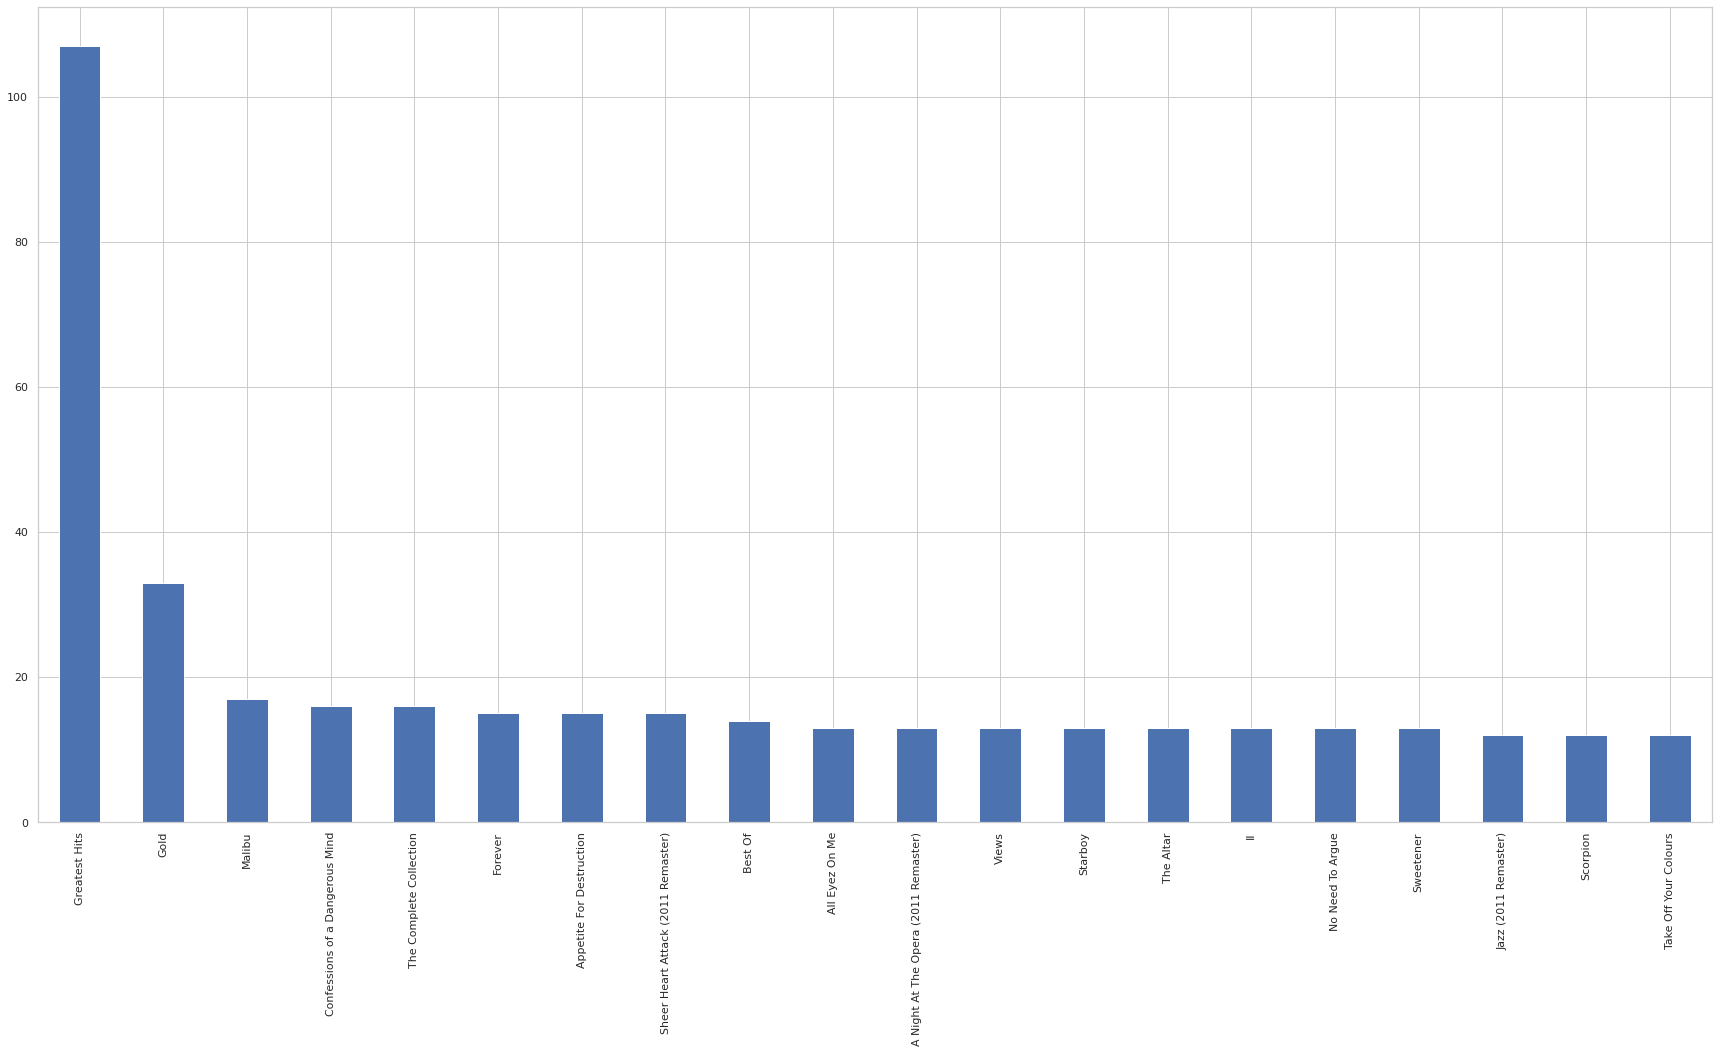

In [ ]:
dfen['track_album_name'].value_counts().head(20).plot(kind='bar',figsize=(30,15))

# check out playlist name, playlist genre, playlist subgenre wordcloud

intuition: songs of the same playlist have more similarity, and should have higher weights

In [ ]:
len(dfen['playlist_name'].unique())

401

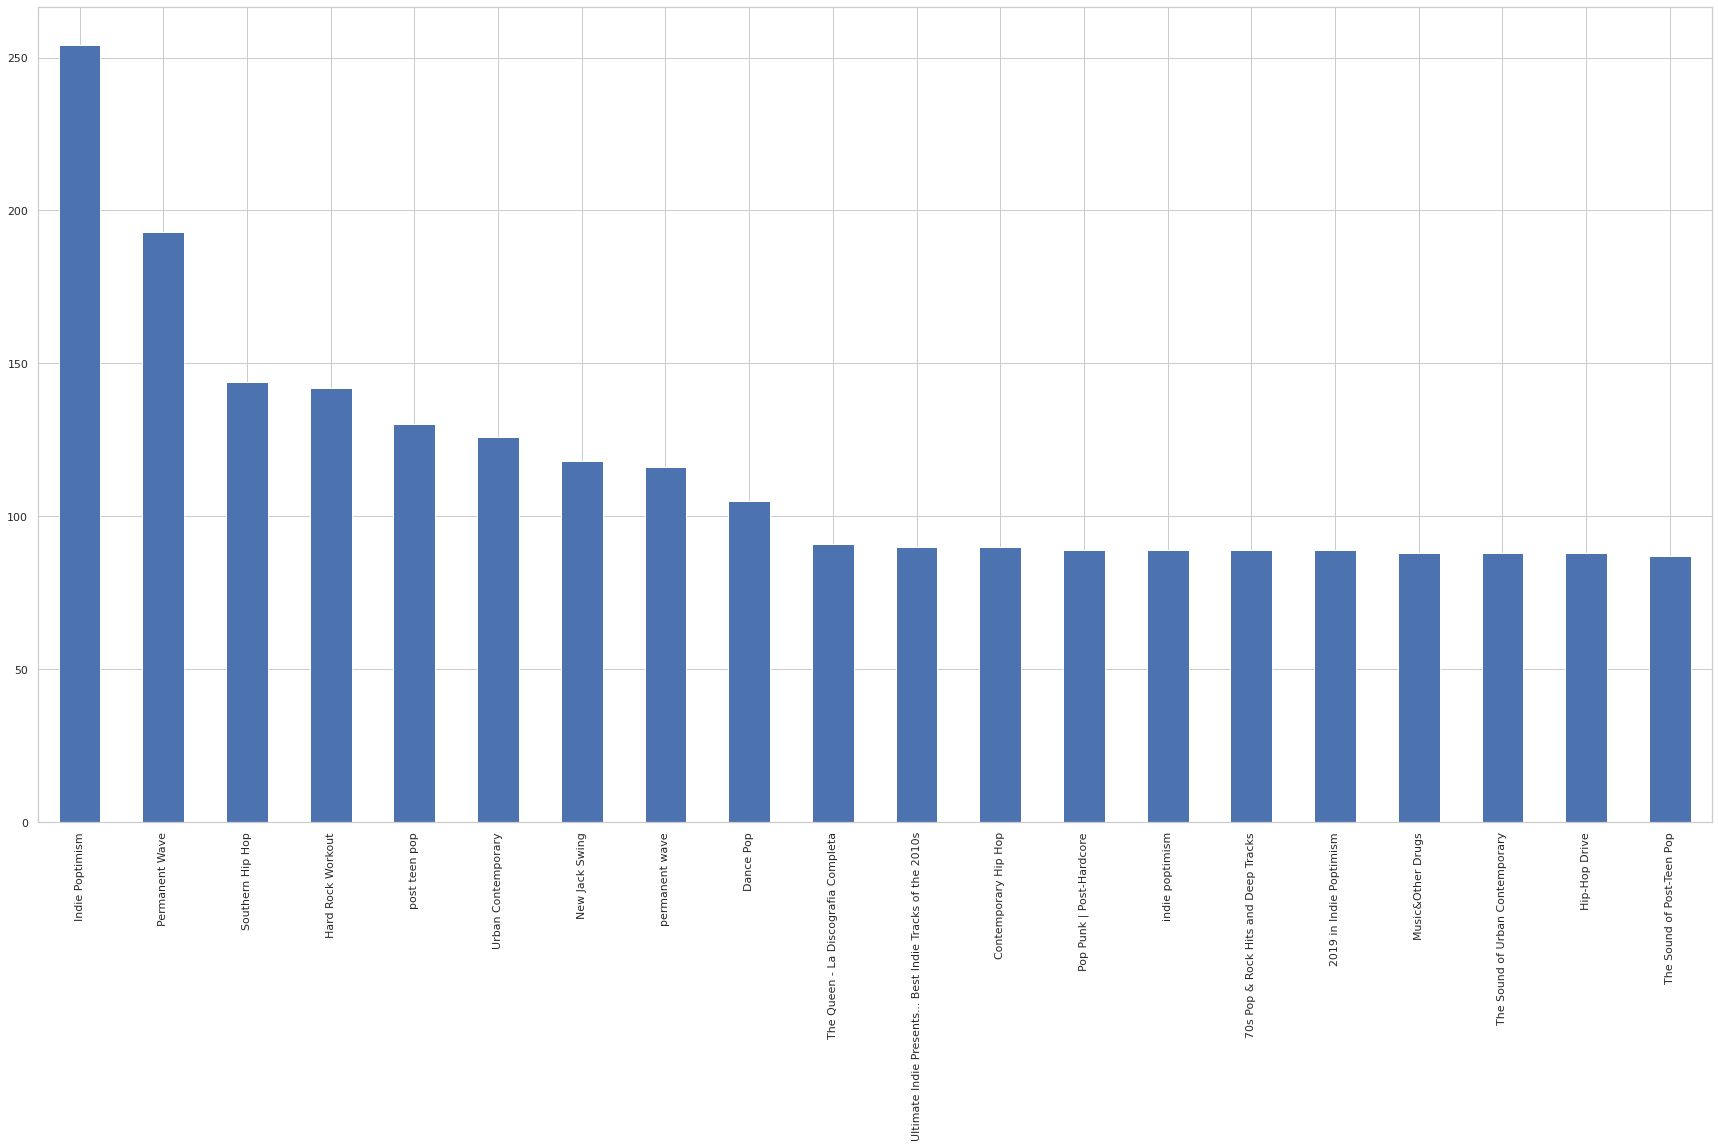

In [ ]:
dfen['playlist_name'].value_counts().head(20).plot(kind='bar',figsize=(30,15))

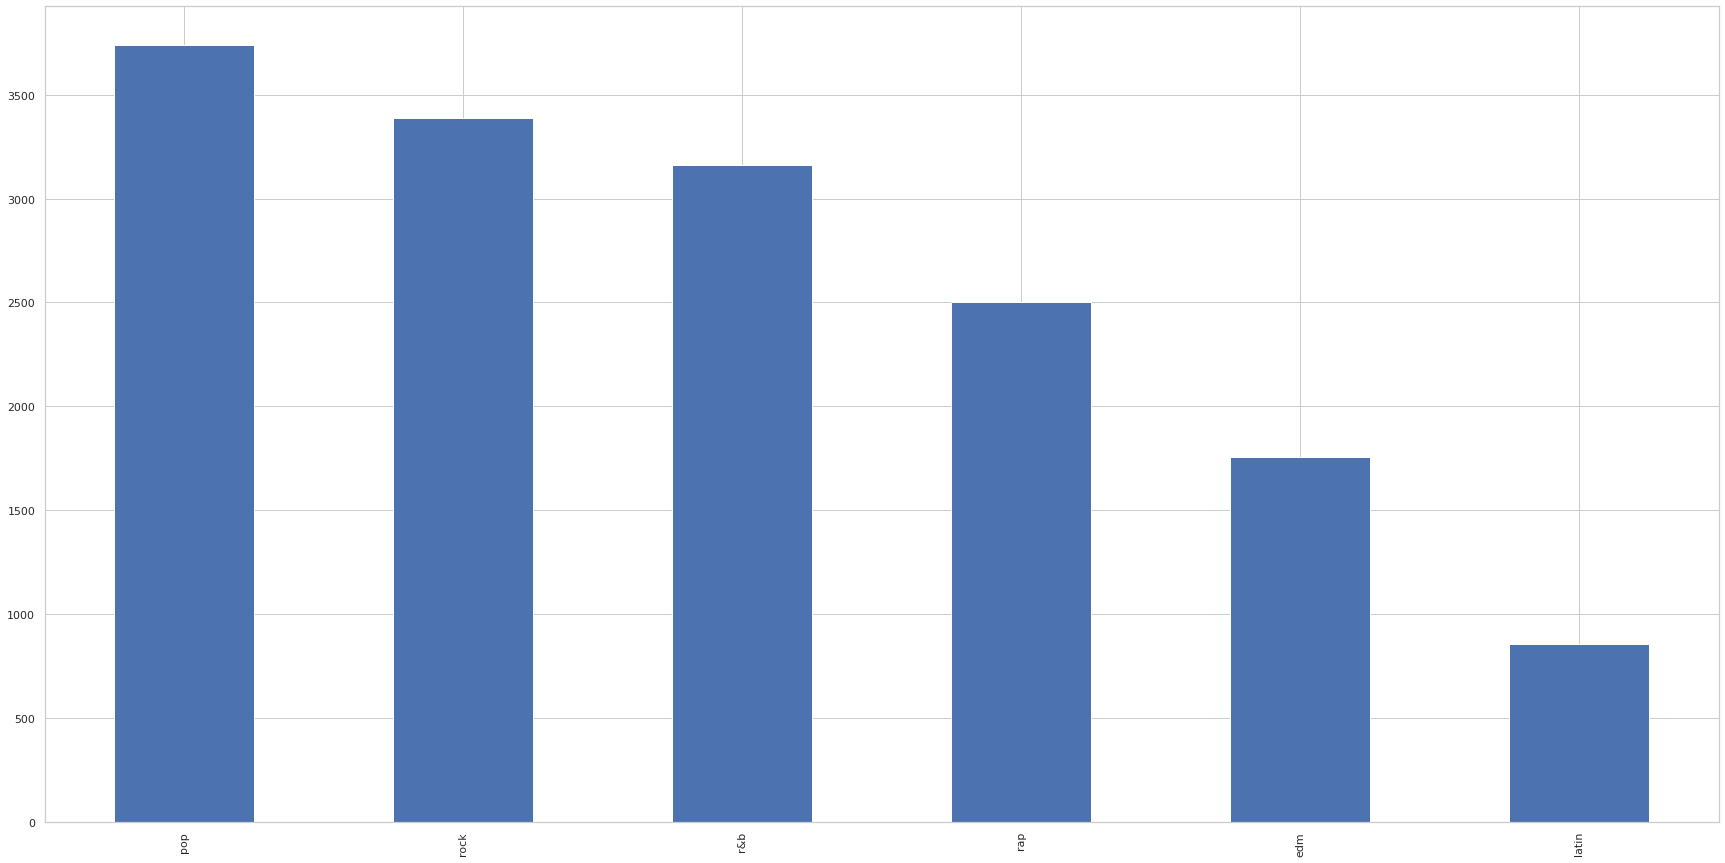

In [ ]:
dfen['playlist_genre'].value_counts().head(20).plot(kind='bar',figsize=(30,15))

as expected, pop is, well, the most pop-ular

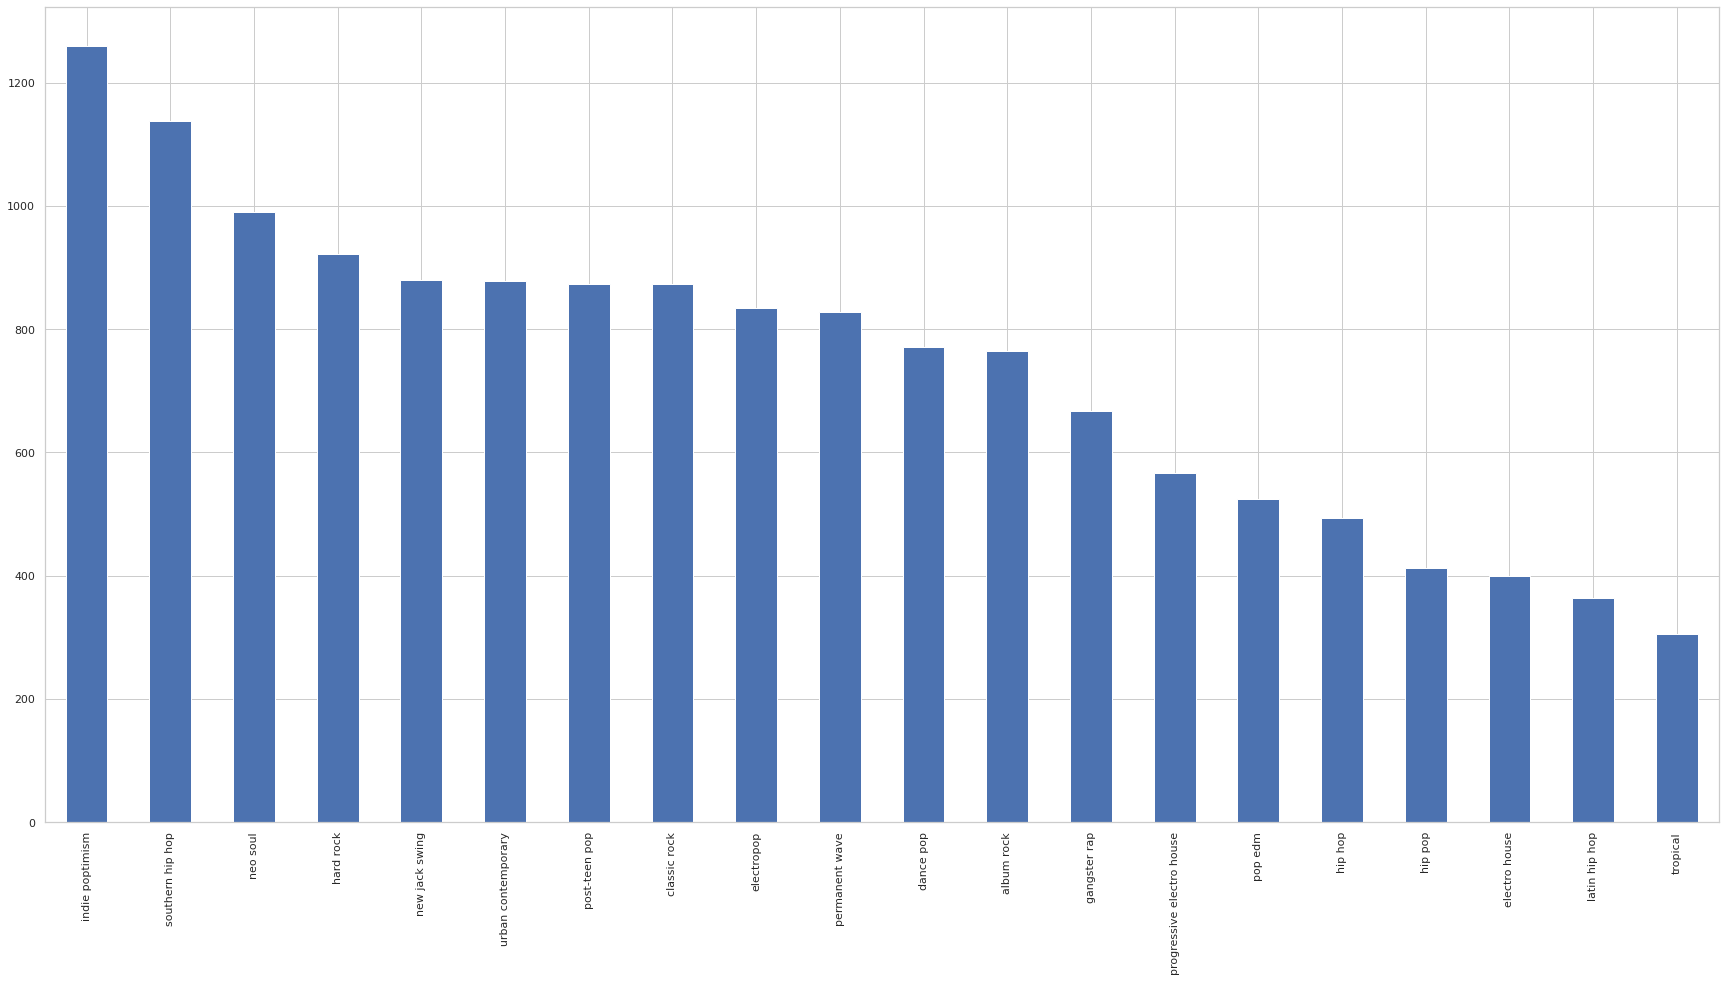

In [ ]:
dfen['playlist_subgenre'].value_counts().head(20).plot(kind='bar',figsize=(30,15))

In [ ]:
dfen['playlist_subgenre'].value_counts()

indie poptimism              1260
southern hip hop             1137
neo soul                      990
hard rock                     922
new jack swing                880
urban contemporary            878
post-teen pop                 873
classic rock                  873
electropop                    835
permanent wave                828
dance pop                     771
album rock                    765
gangster rap                  667
progressive electro house     566
pop edm                       524
hip hop                       494
hip pop                       413
electro house                 400
latin hip hop                 364
tropical                      306
big room                      268
trap                          204
latin pop                     177
reggaeton                      10
Name: playlist_subgenre, dtype: int64

# Tokenize using different embeddings:



*   tf-idf
*   word2vec
*   GloVe



In [ ]:
dfen.shape

(15405, 25)

In [ ]:
dfen.select_dtypes('object').columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_id', 'playlist_genre', 'playlist_subgenre', 'language'],
      dtype='object')

In [ ]:
dfen.select_dtypes('object').describe()

,track_id,track_name,track_artist,lyrics,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,language
count,15405,15405,15405,15405,15405,15405,15405,15405,15405,15405,15405,15405
unique,15405,12513,4936,13414,11776,10388,3485,401,423,6,24,1
top,2XU0oxnq2qxCpomAAuJY8K,Poison,Queen,"NA Yeah, Spyderman and Freeze in full effect U...",6GeHCNwwqMMUrpxuGTRYcf,Greatest Hits,2013-01-01,Indie Poptimism,3E88dLx4fgFYY70gdGzdnB,pop,indie poptimism,en
freq,1,12,122,7,16,107,142,254,91,3739,1260,15405


In [ ]:
dfen['track_album_release_date'] = pd.to_datetime(dfen['track_album_release_date'])
dfen.dtypes

track_id                            object
track_name                          object
track_artist                        object
lyrics                              object
track_popularity                     int64
track_album_id                      object
track_album_name                    object
track_album_release_date    datetime64[ns]
playlist_name                       object
playlist_id                         object
playlist_genre                      object
playlist_subgenre                   object
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
mode                                 int64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration_ms

In [ ]:
countvectorized_cols = dfen[['track_name','track_artist','track_album_name']]
lyrics = dfen['lyrics']
music_features = dfen.select_dtypes(['float64','int64'])

### creating the corpus to train word2vec on

In [ ]:
dfen['combined'] = ' ' + dfen['track_name'] + ' ' + dfen['track_album_name'] + ' ' \
                   + dfen['track_artist'] + ' ' + dfen['lyrics']

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
def cleaning(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    #stops = set(stopwords.words("english"))
    #text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [ ]:
dfen['combined_clean'] = dfen['combined'].apply(cleaning)

In [ ]:
dfen.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'combined'],
      dtype='object')

### creating the bigrams

In [ ]:
dfen['lyrics'] = dfen['lyrics'].apply(cleaning)

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower(),), tags=[str(i)]) for i, _d in enumerate(dfen['combined_clean'].tolist())]

In [ ]:
song_details = dfen[['track_name','track_artist','track_album_name']]

In [ ]:
tagged_data[0].tags

['0']

In [ ]:
#song_details['tagged_data'] = np.zeros(song_details.shape[0])
song_details['tags'] = np.zeros(song_details.shape[0])
for i,t_data in enumerate(tagged_data):
  #print(i)
  #song_details['tagged_data'].iloc[i] = t_data
  song_details['tags'].iloc[i] = t_data.tags[0]

<ipython-input-96-c141993c3ffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_details['tags'] = np.zeros(song_details.shape[0])
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
song_details.head()

,track_name,track_artist,track_album_name,tagged_data,tags
6925,Dance Monkey,Tones and I,Dance Monkey (Stripped Back) / Dance Monkey,"([they, say, oh, my, god, i, see, the, way, yo...",[0]
14477,ROXANNE,Arizona Zervas,ROXANNE,"([all, for, the, gram, bitches, love, the, gra...",[1]
4813,Circles,Post Malone,Hollywood's Bleeding,"([oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, ...",[2]
1754,Blinding Lights,The Weeknd,Blinding Lights,"([yeah, i, ve, been, tryna, call, i, ve, been,...",[3]
1375,The Box,Roddy Ricch,Please Excuse Me For Being Antisocial,"([pullin, out, the, coupe, at, the, lot, told,...",[4]


#### initializing model and parameters

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
max_epochs = 100
vec_size = 400
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=2,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

### Now that words are initilazed, we can get embeddings for the features

In [ ]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
sample = str(dfen.sample()['combined'].values)
print(f'sample: {sample}')
test_data = word_tokenize(sample.lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)


sample: [" Cranes in the Sky A Seat at the Table Solange I tried to drink it away I tried to put one in the air I tried to dance it away I tried to change it with my hair I ran my credit card bill up Thought a new dress would make it better I tried to work it away But that just made me even sadder I tried to keep myself busy I ran around in circles Think I made myself dizzy I slept it away, I sexed it away I read it away Away Away, away, away, away, away Away, away, away, away, away Well it's like cranes in the sky Sometimes I don't wanna feel those metal clouds Yeah, it's like cranes in the sky Sometimes I don't wanna feel those metal clouds I tried to run it away Thought then my head be feeling clearer I traveled 70 states Thought moving round make me feel better I tried to let go my lover Thought if I was alone then maybe I could recover To write it away or cry it away Don't you cry baby Away Away, away, away, away, away Away, away, away, away, away But it's like cranes in the sky S

In [ ]:
similar_doc = model.docvecs.most_similar('3')
similar_doc

[('2431', 0.3816039562225342),
 ('11719', 0.3746976852416992),
 ('1754', 0.3625679612159729),
 ('1366', 0.35935482382774353),
 ('14900', 0.35559600591659546),
 ('9901', 0.35469406843185425),
 ('9575', 0.3466705083847046),
 ('10269', 0.34506627917289734),
 ('10428', 0.3440576493740082),
 ('9811', 0.3405865728855133)]

In [ ]:
for tag,percentage in similar_doc:
  found = pd.DataFrame(song_details[song_details['tags'] == tag])
  t_name = found['track_name'].values[0]
  #print(found)
  print( f"Song: {t_name} by {found['track_artist'].values[0]} from album : {found['track_album_name'].values[0]} with similarity percentage: {percentage}")

Song: Deep by Summer Walker from album : Last Day Of Summer with similarity percentage: 0.3816039562225342
Song: I Feel It Coming by The Weeknd from album : Starboy with similarity percentage: 0.3746976852416992
Song: I Feel It Coming by The Weeknd from album : Starboy with similarity percentage: 0.3625679612159729
Song: Ghost by Au/Ra from album : Ghost with similarity percentage: 0.35935482382774353
Song: BAMF by Pegboard Nerds from album : BAMF with similarity percentage: 0.35559600591659546
Song: Nostalgic by A R I Z O N A from album : Nostalgic with similarity percentage: 0.35469406843185425
Song: Wakanda by Dimitri Vegas & Like Mike from album : Wakanda with similarity percentage: 0.3466705083847046
Song: You're the One for Me by Great Good Fine Ok from album : Body Diamond with similarity percentage: 0.34506627917289734
Song: Told You Once by Foxa from album : Told You Once with similarity percentage: 0.3440576493740082
Song: Flow - Remastered by Sade from album : The Ultimate C

In [ ]:
popular_samples = dfen[dfen['track_artist']=='The Weeknd'].sample(2)

In [ ]:
weeknd_samples = popular_samples
weeknd_samples

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language,combined
4865,22SXyL6pUjwIvGWvgGjLov,Can't Feel My Face - Martin Garrix Remix,The Weeknd,NA And I know she'll be the death of me At lea...,56,12yYl13Ce7u8LuhtEl75aQ,Can't Feel My Face (Martin Garrix Remix),2015-11-06,EDM - pop remixes,0cvVad4XizGbOS0vlwZYS5,...,0,0.107,0.00791,0.000028,0.3150,0.121,128.009,252933,en,Can't Feel My Face - Martin Garrix Remix Can'...
7737,3dhjNA0jGA8vHBQ1VdD6vV,I Feel It Coming,The Weeknd,"Yeah, uh Tell me what you really like Baby, I ...",80,2ODvWsOgouMbaA5xf0RkJe,Starboy,2016-11-25,BALLARE - رقص,1CMvQ4Yr5DlYvYzI0Vc2UE,...,0,0.118,0.42600,0.000000,0.0679,0.585,92.990,269187,en,"I Feel It Coming Starboy The Weeknd Yeah, uh ..."


In [ ]:
mariah_samples = dfen[dfen['track_artist'] =='Mariah Carey'].sample(2)
mariah_samples

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language,combined
5602,2g2N78BH9x4iAzeSvjG7dU,All I Want For Christmas Is You,Mariah Carey,I don't want a lot for Christmas There is just...,18,63OsyEW79JFEVI8k4Abuo6,Merry Christmas II You,2010-01-01,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,...,0,0.0586,0.0759,0.0,0.127,0.449,150.031,242347,en,All I Want For Christmas Is You Merry Christm...
16356,6xkryXuiZU360Lngd4sx13,Fantasy,Mariah Carey,"Oh, when you walk by every night Talking sweet...",71,1ibYM4abQtSVQFQWvDSo4J,Daydream,1995-09-26,1987-1997 OLD SKOOL JAMZ,0WicovBbxeB0nvQC6IfuaT,...,1,0.0350,0.1390,0.0,0.123,0.801,102.358,243493,en,"Fantasy Daydream Mariah Carey Oh, when you wa..."


In [ ]:
similar_doc = model.docvecs.most_similar()

In [ ]:
from scipy import spatial

weeknd1 = weeknd_samples['lyrics'].iloc[0].split()
weeknd2 = weeknd_samples['lyrics'].iloc[1].split()

mariah1 = mariah_samples['lyrics'].iloc[0].split()
mariah2 = mariah_samples['lyrics'].iloc[1].split()

weeknd, mariah = [],[]
weeknd.append(model.infer_vector(weeknd1))
weeknd.append(model.infer_vector(weeknd2))
mariah.append(model.infer_vector(mariah1))
mariah.append(model.infer_vector(mariah2))
keys = ['w1m1','w1m2','w2m1','w2m2']
distances = {}
i= 0
for w in weeknd:
  for m in mariah:   
    distances[keys[i]] = (spatial.distance.cosine(w, m))
    i+=1
distances['w1w2'] = spatial.distance.cosine(weeknd[1],weeknd[0])
distances['m1m2'] = spatial.distance.cosine(mariah[1],mariah[0])
print(distances)

{'w1m1': 0.8010381162166595, 'w1m2': 0.9425470791757107, 'w2m1': 0.7070284187793732, 'w2m2': 0.8156553357839584, 'w1w2': 0.7952376902103424, 'm1m2': 0.7234812676906586}


In [ ]:
split = lambda x:x.split()
lyrics_split = lyrics.apply(split)
lyrics_split.head()

6925     [They, say,, "Oh, my, God,, I, see, the, way, ...
14477    [All, for, the, 'Gram, Bitches, love, the, 'Gr...
4813     [Oh,, oh,, oh, Oh,, oh,, oh, Oh,, oh,, oh,, oh...
1754     [Yeah, I've, been, tryna, call, I've, been, on...
1375     [Pullin', out, the, coupe, at, the, lot, Told,...
Name: lyrics, dtype: object

In [ ]:
vectorized_lyrics = lyrics_split.apply(model.infer_vector)

In [ ]:
lyrics_vectorized = pd.DataFrame(vectorized_lyrics.values.tolist(), index=vectorized_lyrics.index)

In [ ]:
lyrics_vectorized.shape

(15405, 200)

In [ ]:
lyrics_vectorized.to_csv('vectorized_lyrics.csv',index=False)

### first visualizing the embeddings

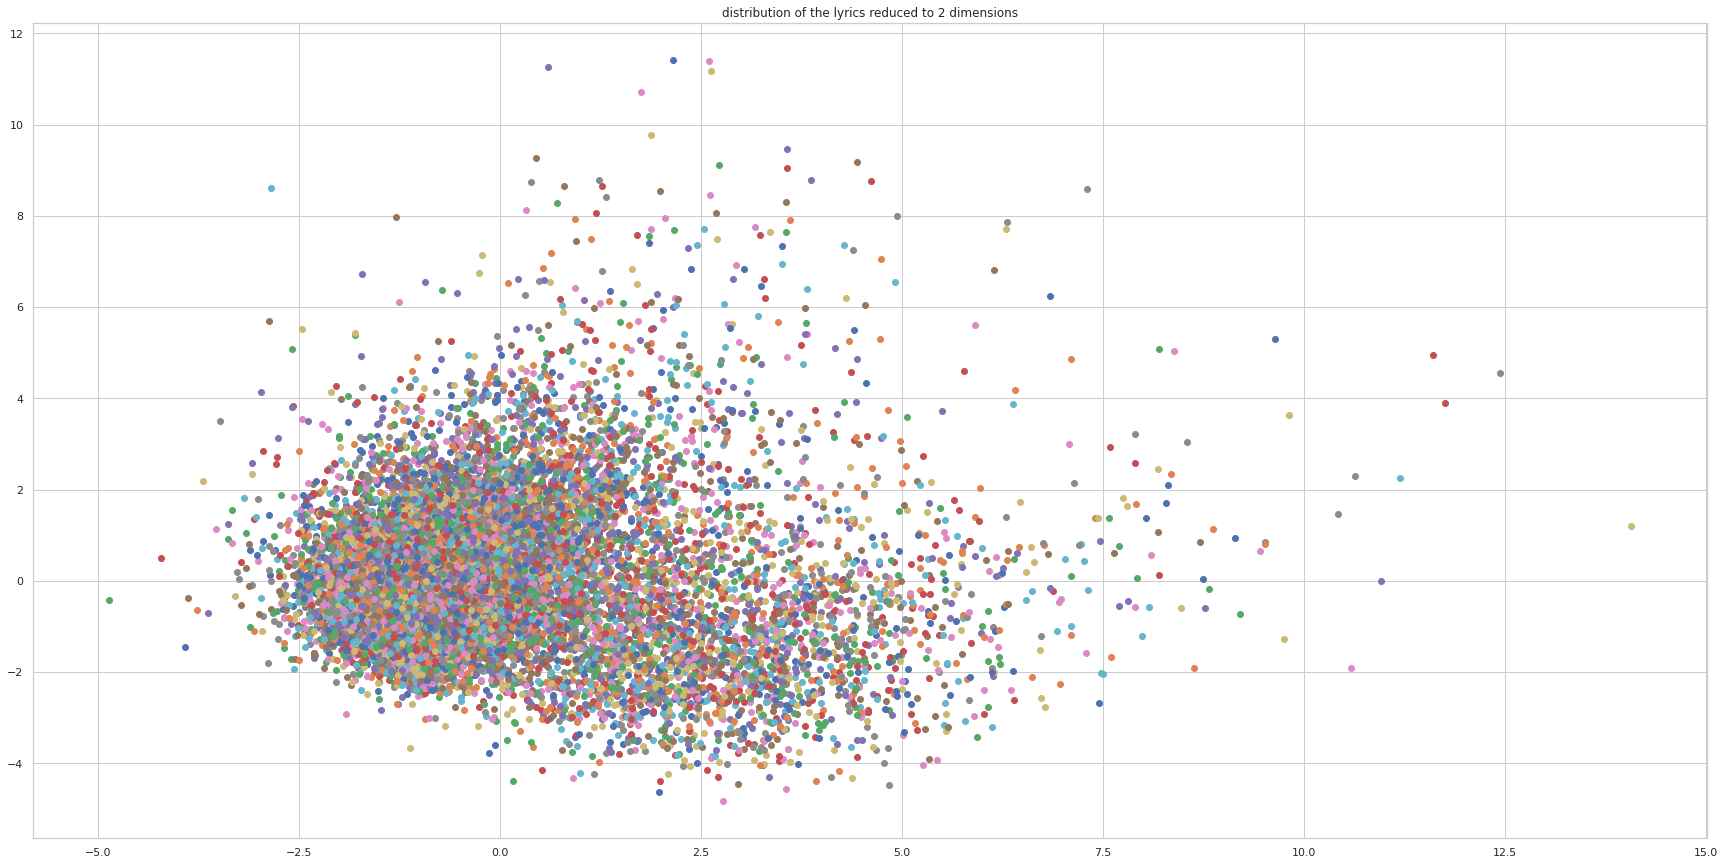

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


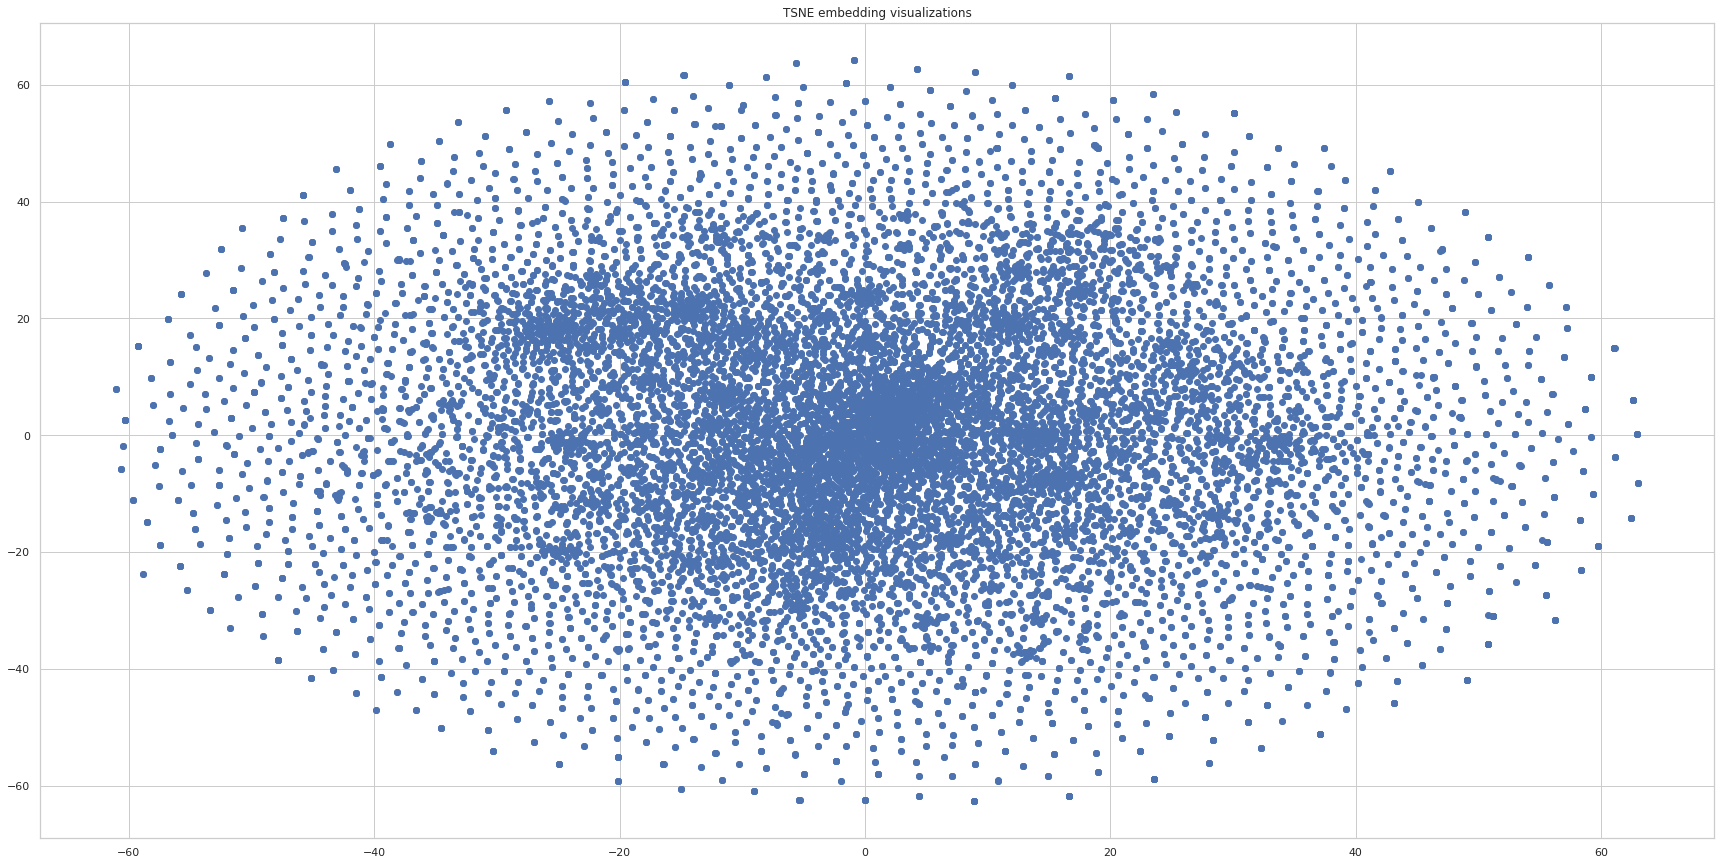

In [ ]:
num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2
X = lyrics_vectorized
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots(figsize=(30, 15))
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    #color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2)
plt.title('distribution of the lyrics reduced to 2 dimensions')
plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.figure(figsize=(30,15))
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title('TSNE embedding visualizations')

plt.show()